## Does unsupervised clustering improve model performance for classifiying survival months in Colorectal Cancer?

In [184]:
import pandas as pd
import numpy as np
import statistics

In [185]:
data = pd.read_csv('export1.csv')
data.head()

C:\Users\Gchan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (107,143,151) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Age recode with <1 year olds,Sex,Year of diagnosis,PRCDA 2017,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)","Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Site recode ICD-O-3/WHO 2008,Behavior recode for analysis,AYA site recode/WHO 2008,...,SS seq # - mal (least detail),SS seq # 1975+ - mal (least detail),SS seq # 1992+ - mal (least detail),SS seq # 2000+ - mal (least detail),Site - malignant (least detail),Patient ID,Type of Reporting Source,Marital status at diagnosis,Median household income inflation adj to 2018,Rural-Urban Continuum Code
0,65-69 years,Male,2000,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Rectum,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,19,Hospital inpatient/outpatient or clinic,Single (never married),"$75,000+",Counties in metropolitan areas ge 1 million pop
1,35-39 years,Female,2008,Not PRCDA,White,Spanish-Hispanic-Latino,Hispanic (All Races),Rectosigmoid Junction,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,25,Hospital inpatient/outpatient or clinic,Single (never married),"$75,000+",Counties in metropolitan areas ge 1 million pop
2,80-84 years,Female,2008,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Ascending Colon,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,337,Hospital inpatient/outpatient or clinic,Widowed,"$75,000+",Counties in metropolitan areas ge 1 million pop
3,65-69 years,Female,2014,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Non-Hispanic Asian or Pacific Islander,Rectum,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,465,Hospital inpatient/outpatient or clinic,Single (never married),"$75,000+",Counties in metropolitan areas ge 1 million pop
4,75-79 years,Male,2004,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Rectum,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,764,Hospital inpatient/outpatient or clinic,Married (including common law),"$75,000+",Counties in metropolitan areas ge 1 million pop


## Trimming down number of columns and rows

In [186]:
(data == 'Blank(s)').sum(axis=0)

Age recode with <1 year olds                     0
Sex                                              0
Year of diagnosis                                0
PRCDA 2017                                       0
Race recode (W, B, AI, API)                      0
                                                ..
Patient ID                                       0
Type of Reporting Source                         0
Marital status at diagnosis                      0
Median household income inflation adj to 2018    0
Rural-Urban Continuum Code                       0
Length: 196, dtype: int64

In [187]:
data = data.loc[:, data.isin(['Blank(s)']).mean() < .4]

Sum of "Blank(s)" within each column, remove column with over 60% "Blank(s)"  
**Removed 76 columns, from 196 to 120 columns**

In [188]:
for col in data:
    print(data[col].unique())

['65-69 years' '35-39 years' '80-84 years' '75-79 years' '60-64 years'
 '70-74 years' '45-49 years' '85+ years' '40-44 years' '50-54 years'
 '55-59 years' '30-34 years' '20-24 years' '25-29 years' '15-19 years'
 '00 years' '10-14 years' '05-09 years' '01-04 years']
['Male' 'Female']
[2000 2008 2014 2004 2011 2007 2009 2005 2017 2015 2001 2016 2012 2006
 2003 2013 2002 2010]
['Not PRCDA' 'PRCDA' 'Unknown PRCDA']
['White' 'Asian or Pacific Islander' 'American Indian/Alaska Native'
 'Black' 'Unknown']
['Non-Spanish-Hispanic-Latino' 'Spanish-Hispanic-Latino']
['Non-Hispanic White' 'Hispanic (All Races)'
 'Non-Hispanic Asian or Pacific Islander' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native' 'Non-Hispanic Unknown Race']
['Rectum' 'Rectosigmoid Junction' 'Ascending Colon' 'Appendix'
 'Sigmoid Colon' 'Cecum' 'Large Intestine, NOS' 'Transverse Colon'
 'Splenic Flexure' 'Descending Colon' 'Hepatic Flexure']
['Malignant']
['8.6.1 Carcinoma of colon and rectum'
 '10 Unspecifie

['Not Brain']
['XIf2 Carcinomas of colon and rectum' 'XIf3 Carcinomas of appendix'
 'XIIb Other unspecified malignant tumors'
 'XIIa1 Malignant gastrointestinal stromal tumor'
 'IXe Unspecified soft tissue sarcomas' 'IXd6 Leiomyosarcomas'
 'XIIa4 Other complex mixed and stromal neoplasms'
 'XId Malignant melanomas' 'XIf10 Carcinomas of other specified sites'
 'IXb1 Fibroblastic and myofibroblastic tumors'
 'Not classified by SEER or in situ'
 'Xb5 Choriocarcinomas of extracranial and extragonadal sites'
 'IXb2 Nerve sheath tumors' 'IXd8 Blood vessel tumors'
 'IXd11 Miscellaneous soft tissue sarcomas' 'IXd5 Fibrohistiocytic tumors'
 'IXa Rhabdomyosarcomas' 'IXd4 Liposarcomas'
 'Xb1 Malignant germinomas of extracranial and extragonadal sites'
 'IXd7 Synovial sarcomas' 'VIb Renal carcinomas'
 'IXb3 Other fibromatous neoplasms'
 'IXd3 Extrarenal extrahepatic rhabdoid tumor'
 'IXd2 Peripheral neuroectodermal tumor (pPNET) of soft tissue'
 'XIb Thyroid carcinomas' 'IIIc2 Primitive neuroectod

['Blank(s)' '3' '0' '5' '9' '1' '6' '2' '8']
['Blank(s)' '3' '0' '5' '9' '1' '6' '2' '8']
['Blank(s)' '3' '0' '1' '9' '5' '6' '2' '8']
['Blank(s)' '020' '998' '010' '999' '030' '997']
['Blank(s)' '100' '020' '988' '000' '999' '400' '120' '010' '200' '110'
 '005' '998' '003' '300' '001']
['Blank(s)' '988' 988]
['Blank(s)' '020510' '020550' '020540' '020530' '020520']
['Blank(s)' '010401' '020550' '010100' '020302' '010300' '010200' '020440'
 '010002' '020200' '010400' '010004' '010003' '010000' '020100' '020001'
 '010005' '000937']
['Blank(s)' '020550']
['Rectum and Rectosigmoid Junction' 'Alive'
 'Chronic Obstructive Pulmonary Disease and Allied Cond'
 'Other Cause of Death' 'Colon excluding Rectum' 'Diseases of Heart'
 'Nephritis, Nephrotic Syndrome and Nephrosis' 'Cerebrovascular Diseases'
 'Urinary Bladder' 'Aortic Aneurysm and Dissection' 'Lung and Bronchus'
 'Diabetes Mellitus'
 'State DC not available or state DC available but no COD'
 'Atherosclerosis' 'Other Infectious and Para

['Malignant' 'Borderline malignancy']
[8140 8480 8261 8246 8000 8263 8210 8490 8240 8243 8070 8010 8123 8481
 8262 8930 8211 8244 8041 8510 8800 8560 8012 8890 8980 8021 8720 8221
 8245 8220 8032 8470 8124 8570 8001 8071 8933 8801 8145 8310 8072 8020
 8440 8814 8542 8323 8550 8891 8241 8500 8144 8094 8572 9100 8260 9540
 8503 8143 8050 8141 8950 8051 8441 8721 8742 8033 8142 9120 8380 8802
 8045 8830 8120 8730 8931 8030 8920 8461 8858 8082 8201 8772 8022 8711
 8230 8951 9064 9040 8073 8004 8251 8312 8571 8744 8430 8896 9580 8963
 9180 8900 8810 8052 8074 8460 9364 8410 8031 8044 9473 8851 8471 9015
 8850 8804 8075 8722 8320 8042 8076 9044 9130 8811 9260 8043 8982 8761
 8250 9560 8573 9085 9500 8003 8147 8683 8940 8780 8770 9150 8002 8153
 8472 8160 8011 8280 9041 9561]
['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black' 'Unknown']
['69 years' '39 years' '82 years' '67 years' '78 years' '64 years'
 '70 years' '76 years' '49 years' '85+ years' '65 years' '41 yea

**List unique values of each column, select columns to delete based on redundancy, usefulness, past literature, and reference guide to column information from SEER database**

In [189]:
data.drop(data.iloc[:,77:116], axis = 1, inplace = True)

In [190]:
data.drop(data.iloc[:,74:75], axis = 1, inplace = True)

In [191]:
data.drop(data.iloc[:,68:73], axis = 1, inplace = True)

In [192]:
data.drop(data.iloc[:,47:51], axis = 1, inplace = True)

In [193]:
data.drop(data.columns[36], axis = 1, inplace = True)

In [194]:
data.drop(data.iloc[:,21:29], axis = 1, inplace = True)

In [195]:
data.drop(data.iloc[:,8:18], axis = 1, inplace = True)

In [196]:
data.drop(data.iloc[:,2:6], axis = 1, inplace = True)

**Narrow down columns with target class information. Group three column together to form 1 column that has labels either "dead", "alive" or "dead other". Drop 2 unnecessary columns, drop rows with "dead other"**

In [197]:
data.iloc[: , 37:40]

,COD to site recode,SEER cause-specific death classification,SEER other cause of death classification
0,Rectum and Rectosigmoid Junction,Dead (attributable to this cancer dx),Alive or dead due to cancer
1,Alive,Alive or dead of other cause,Alive or dead due to cancer
2,Chronic Obstructive Pulmonary Disease and Alli...,Alive or dead of other cause,Dead (attributable to causes other than this c...
3,Alive,Alive or dead of other cause,Alive or dead due to cancer
4,Other Cause of Death,Dead (attributable to this cancer dx),Alive or dead due to cancer
...,...,...,...
690445,Colon excluding Rectum,Dead (attributable to this cancer dx),Alive or dead due to cancer
690446,Rectum and Rectosigmoid Junction,Dead (attributable to this cancer dx),Alive or dead due to cancer
690447,Alive,Alive or dead of other cause,Alive or dead due to cancer
690448,Alive,Alive or dead of other cause,Alive or dead due to cancer


In [198]:
data.loc[data['COD to site recode'] == 'Alive', 'SEER cause-specific death classification'] = 'Alive'

In [199]:
data['SEER cause-specific death classification'] = data['SEER cause-specific death classification'].replace(['Alive or dead of other cause'], 'Dead Other')

In [200]:
data['SEER cause-specific death classification'] = data['SEER cause-specific death classification'].replace(['Dead (attributable to this cancer dx)'], 'Dead')

In [201]:
data['SEER cause-specific death classification'] = data['SEER cause-specific death classification'].replace(['Dead (missing/unknown COD)'], 'Dead Other')

In [202]:
data.drop(data.columns[37], axis = 1, inplace = True)

In [203]:
data.drop(data.columns[38], axis = 1, inplace = True)

In [204]:
data1 = data[data['SEER cause-specific death classification'] != "Dead Other"]

In [205]:
data1 = data1[data1['SEER cause-specific death classification'] != "N/A not seq 0-59"]

In [206]:
for col in data1:
    print(data1[col].unique())

['65-69 years' '35-39 years' '75-79 years' '60-64 years' '70-74 years'
 '40-44 years' '50-54 years' '85+ years' '55-59 years' '45-49 years'
 '80-84 years' '30-34 years' '20-24 years' '25-29 years' '15-19 years'
 '00 years' '10-14 years' '05-09 years' '01-04 years']
['Male' 'Female']
['Non-Hispanic White' 'Hispanic (All Races)'
 'Non-Hispanic Asian or Pacific Islander' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native' 'Non-Hispanic Unknown Race']
['Rectum' 'Rectosigmoid Junction' 'Appendix' 'Ascending Colon'
 'Sigmoid Colon' 'Splenic Flexure' 'Transverse Colon' 'Descending Colon'
 'Cecum' 'Hepatic Flexure' 'Large Intestine, NOS']
['Well differentiated; Grade I' 'Moderately differentiated; Grade II'
 'Unknown' 'Poorly differentiated; Grade III'
 'Undifferentiated; anaplastic; Grade IV']
['Not a paired  site' 'Right - origin of primary'
 'Left - origin of primary'
 'Paired site, but no information concerning laterality'
 'Only one side - side unspecified' 'Bilateral, sing

['Counties in metropolitan areas ge 1 million pop'
 'Counties in metropolitan areas of 250,000 to 1 million pop'
 'Nonmetropolitan counties adjacent to a metropolitan area'
 'Nonmetropolitan counties not adjacent to a metropolitan area'
 'Counties in metropolitan areas of lt 250 thousand pop'
 'Unknown/missing/no match/Not 1990-2017'
 'Unknown/missing/no match (Alaska or Hawaii - Entire State)']


In [207]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543412 entries, 0 to 690448
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   Age recode with <1 year olds                                543412 non-null  object
 1   Sex                                                         543412 non-null  object
 2   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  543412 non-null  object
 3   Site recode ICD-O-3/WHO 2008                                543412 non-null  object
 4   Grade                                                       543412 non-null  object
 5   Laterality                                                  543412 non-null  object
 6   Diagnostic Confirmation                                     543412 non-null  object
 7   Summary stage 2000 (1998+)                                  543412 non-null  object

### Review all possible 'unknown' labels, not only "Blank(s)" & Review each column closely
* [2]: 'Non-Hispanic Unknown Race'
* [4]: 'Unknown'
* [5]: 'Paired site, but no information concerning laterality'
* [6]: 'Unknown'
* [7]: 'Unknown/unstaged'
* [8]: 'Blank(s)', 'Unknown/unstaged/unspecified/DCO'
* [9]: 'Blank(s)', 'Unstaged'
* [10]: 'Blank(s)', nan, 'UNK Stage'
* [11]: 'Blank(s)', 'TX', nan
* [12]: 'Blank(s)', 'NX, nan
* [13]: 'Blank(s)', 'MX, nan
* [14]: '99'
* [15]: 'Blank(s)'
* [16]: **Remove** column completely, not as specific as other columns, redundant
* [21]: 'Blank(s)', 'Sequence unknown'
* [22]: '95', '96', '97', '98', '99', '126'
* [23]: '95', '97', '99', '126'
* [24]: 'Blank(s)', '999', '888', '1022'
* [25]: 'Blank(s)', '999' ## CS extension same as T Stage
* [26]: 'Blank(s)', '999' ## CS lymph nodes same as N Stage
* [27]: 'Blank(s)', '99' ## CS mets at dx same as M Stage
* [28, 29, 30]: **Remove** columns completley, used to determine last 3 columns
* [31]: 'Blank(s)', '999', '997' ##SSF1
* [32]: 'Blank(s)', '999', '988' ##SSF2, similar to N stage, no. of metastases in regional nodes or no. of regional nodes positive (may be removed as redundant)
* [33]: **Remove** completely, all values 'Blank(s)' or '988'
* [34, 35, 36]: **remove** completely, CS Version information
* [38]: 'Unknown'
* [42]: **Remove** column
* [44]: 'Unknown/missing/no match/Not 1990-2017'
* [45]: **Remove** column

**Regional nodes examined**  
00: No nodes were examined  
01-89: Exact number of nodes examined  
90: 90 or more nodes were examined  
95: No regional nodes were removed, but aspiration of regional nodes was performed  
96: Regional lymph node removal was documented as a sampling, and the number of nodes is unknown/not stated  
97: Regional lymph node removal was documented as a dissection, and the number of nodes is unknown/not stated  
98: Regional lymph nodes were surgically removed, but the number of lymph nodes is unknown/not stated and not documented as a sampling or dissection; nodes were examined, but the number is unknown  
99: Unknown whether nodes were examined; not applicable or negative; not stated in patient record  
126: Blank  

**Regional nodes positive**  
00: All nodes examined are negative  
01-89: Exact number of nodes positive  
90: 90 or more nodes are positive  
95: Positive aspiration of lymph node(s) was performed  
97: Positive nodes are documented, but number is unspecified  
98: No nodes were examined  
99: Unknown whether nodes are positive; not applicable; not stated in patient record  
126: Blank

In [208]:
data1.drop(data1.columns[45], axis = 1, inplace = True)

In [209]:
data1.drop(data1.columns[42], axis = 1, inplace = True)

In [210]:
data1.drop(data1.iloc[:,34:37], axis = 1, inplace = True)

In [211]:
data1.drop(data1.columns[33], axis = 1, inplace = True)

In [212]:
data1.drop(data1.iloc[:,28:31], axis = 1, inplace = True)

In [213]:
data1.drop(data1.columns[16], axis = 1, inplace = True)

### Removing rows where blanks occur in columns that are going to be kept

In [214]:
data2 = data1[data1['Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)'] != 'Non-Hispanic Unknown Race']

In [215]:
data2 = data2[data2['Grade'] != 'Unknown']

In [216]:
data2 = data2[data2['Diagnostic Confirmation'] !='Unknown']

In [217]:
data2 = data2[data2['Summary stage 2000 (1998+)'] != 'Unknown/unstaged']

In [218]:
data2 = data2[data2['SEER Combined Summary Stage 2000 (2004+)'] != 'Unknown/unstaged/unspecified/DCO']

In [219]:
data2 = data2[(data2['SEER historic stage A (1973-2015)'] != 'Blank(s)') & (data2['SEER historic stage A (1973-2015)'] != 'Unstaged')]

In [220]:
data2 = data2[data2['Derived AJCC Stage Group, 6th ed (2004-2015)'] != 'UNK Stage']

In [221]:
data2 = data2[(data2['Derived AJCC T, 6th ed (2004-2015)'] != 'Blank(s)') & (data2['Derived AJCC T, 6th ed (2004-2015)'] != 'TX') & (data2['Derived AJCC T, 6th ed (2004-2015)'].notna())]

In [222]:
data2 = data2[data2['Derived AJCC N, 6th ed (2004-2015)'] != 'NX']

In [223]:
data2 = data2[data2['Derived AJCC M, 6th ed (2004-2015)'] != 'MX']

In [224]:
data2 = data2[data2['RX Summ--Surg Prim Site (1998+)'] != 99]

In [225]:
data2 = data2[(data2['RX Summ--Scope Reg LN Sur (2003+)'] != 'Number of regional lymph nodes removed unknown') & (data2['RX Summ--Scope Reg LN Sur (2003+)'] != 'Unknown or not applicable')]

In [226]:
data2 = data2[(data2['RX Summ--Systemic/Sur Seq'] != 'Blank(s)') & (data2['RX Summ--Systemic/Sur Seq'] != 'Sequence unknown')]

In [227]:
data2 = data2[(data2['Regional nodes examined (1988+)'] != 99) & (data2['Regional nodes examined (1988+)'] != 126) & (data2['Regional nodes examined (1988+)'] != 98) & (data2['Regional nodes examined (1988+)'] != 97) & (data2['Regional nodes examined (1988+)'] != 95) & (data2['Regional nodes examined (1988+)'] != 96)]

In [228]:
data2 = data2[(data2['Regional nodes positive (1988+)'] != 99) & (data2['Regional nodes positive (1988+)'] != 126) & (data2['Regional nodes positive (1988+)'] != 97) & (data2['Regional nodes positive (1988+)'] != 95)]

In [229]:
data2 = data2[(data2['CS tumor size (2004-2015)'] != '999') & (data2['CS tumor size (2004-2015)'] != '888') & (data2['CS tumor size (2004-2015)'] != '1022')] 

In [230]:
data2 = data2[data2['Survival months'] != 'Unknown']

In [231]:
data2 = data2[data2['Total number of in situ/malignant tumors for patient'] != 'Unknown']

In [232]:
data2 = data2[data2['Median household income inflation adj to 2018'] != 'Unknown/missing/no match/Not 1990-2017']

data3.columns[24:27] same as data3.columns[11:14] ##CS staging vs TNM staging

In [233]:
data2.drop(data2.iloc[:,24:27], axis = 1, inplace = True)

Drop column 24 (SSF1 because most values are unknown or test not ordered, codes: 080, 988, 997 and 999) and 25 (SSF2 because similar to N staging, most values are 000 or 999 or 998 which correspond to unknown / useless values)

In [234]:
data2['CS site-specific factor 1 (2004+ varying by schema)'].value_counts()

020         64709
010         50087
999         45768
998         29064
997          2130
Blank(s)     1487
030           637
Name: CS site-specific factor 1 (2004+ varying by schema), dtype: int64

In [235]:
data2['CS site-specific factor 2 (2004+ varying by schema)'].value_counts() 

000    126970
999     25120
988     17102
400     10407
100      5905
010      2745
200      2293
020      1761
110       942
120       637
Name: CS site-specific factor 2 (2004+ varying by schema), dtype: int64

In [236]:
data2.drop(data2.iloc[:,24:26], axis = 1, inplace = True)

In [237]:
data2.drop(columns=['Reason no cancer-directed surgery'], axis = 1, inplace = True)

In [238]:
data2.drop(columns=['Marital status at diagnosis'], axis = 1, inplace = True)

In [239]:
data2.drop(columns=['Summary stage 2000 (1998+)'], axis = 1, inplace = True)

In [240]:
data2.drop(columns=['SEER historic stage A (1973-2015)'], axis = 1, inplace = True)

#### Keep or discard value 98 (No nodes were examined) in column 'Regional nodes positive (1988+), or bin column with 98 value = 'None'

In [241]:
data2['Regional nodes positive (1988+)'][data2['Regional nodes positive (1988+)'] == 98].value_counts()

98    15427
Name: Regional nodes positive (1988+), dtype: int64

In [242]:
data2['Regional nodes examined (1988+)'][data2['Regional nodes examined (1988+)'] == 0].value_counts()

0    15427
Name: Regional nodes examined (1988+), dtype: int64

In [243]:
data2['Regional nodes positive (1988+)'].corr(data2['Survival months'].astype(int))

-0.12298033068560883

In [244]:
data2['Regional nodes examined (1988+)'].corr(data2['Survival months'].astype(int))

0.046685069467678315

In [245]:
dftest = data2.copy()
dftest = dftest[dftest['Regional nodes positive (1988+)'] != 98]
dftest['Regional nodes positive (1988+)'].corr(dftest['Survival months'].astype(int))

-0.25211320311209956

In [246]:
dftest['Regional nodes examined (1988+)'].corr(dftest['Survival months'].astype(int))

0.0072470564908850505

<AxesSubplot:>

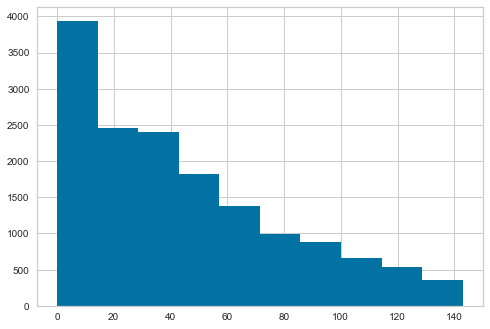

In [247]:
dftest2 = data2.copy()
dftest2 = dftest2[dftest2['Regional nodes positive (1988+)'] == 98]
dftest2['Survival months'].astype(int).hist()

In [248]:
dftest['Regional nodes positive (1988+)'].describe()

count    178455.000000
mean          2.055168
std           4.054779
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          90.000000
Name: Regional nodes positive (1988+), dtype: float64

In [249]:
dftest['Regional nodes positive (1988+)'].median()

0.0

In [250]:
data2['Survival months']=data2['Survival months'].astype(int)

In [251]:
corr = data2[['Regional nodes positive (1988+)', 'Regional nodes examined (1988+)', 'Survival months']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Regional nodes positive (1988+),Regional nodes examined (1988+),Survival months
Regional nodes positive (1988+),1.000000,-0.433425,-0.122980
Regional nodes examined (1988+),-0.433425,1.000000,0.046685
Survival months,-0.122980,0.046685,1.000000


In [252]:
dftest['Survival months'] = dftest['Survival months'].astype(int)

In [253]:
corr = dftest[['Regional nodes positive (1988+)', 'Regional nodes examined (1988+)', 'Survival months']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Regional nodes positive (1988+),Regional nodes examined (1988+),Survival months
Regional nodes positive (1988+),1.000000,0.161220,-0.252113
Regional nodes examined (1988+),0.161220,1.000000,0.007247
Survival months,-0.252113,0.007247,1.000000


Decided to remove the 98 value 

In [254]:
data2 = data2[data2['Regional nodes positive (1988+)'] != 98]

In [255]:
for col in data2:
    print(data2[col].unique())

['35-39 years' '70-74 years' '40-44 years' '80-84 years' '85+ years'
 '60-64 years' '65-69 years' '50-54 years' '55-59 years' '75-79 years'
 '45-49 years' '30-34 years' '25-29 years' '15-19 years' '20-24 years'
 '10-14 years']
['Female' 'Male']
['Hispanic (All Races)' 'Non-Hispanic White' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native'
 'Non-Hispanic Asian or Pacific Islander']
['Rectosigmoid Junction' 'Ascending Colon' 'Sigmoid Colon'
 'Transverse Colon' 'Hepatic Flexure' 'Rectum' 'Cecum' 'Descending Colon'
 'Splenic Flexure' 'Appendix' 'Large Intestine, NOS']
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
['Not a paired  site' 'Right - origin of primary'
 'Left - origin of primary'
 'Paired site, but no information concerning laterality'
 'Only one side - side unspecified' 'Bilateral, single primary']
['Positive histology' 'Positive microscopic confirm, method not s

In [256]:
data2 = data2.reset_index(drop=True)

## Cleaning up and exploring values (Renaming columns, changing type, binning)

### After removing columns and rows - Final dataset 27 columns and 178455

In [257]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178455 entries, 0 to 178454
Data columns (total 27 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   Age recode with <1 year olds                                178455 non-null  object
 1   Sex                                                         178455 non-null  object
 2   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  178455 non-null  object
 3   Site recode ICD-O-3/WHO 2008                                178455 non-null  object
 4   Grade                                                       178455 non-null  object
 5   Laterality                                                  178455 non-null  object
 6   Diagnostic Confirmation                                     178455 non-null  object
 7   SEER Combined Summary Stage 2000 (2004+)                    178455 non-null  object

In [258]:
data2['CS tumor size (2004-2015)']=data2['CS tumor size (2004-2015)'].astype(int)

In [259]:
data2['Total number of in situ/malignant tumors for patient']=data2['Total number of in situ/malignant tumors for patient'].astype(int)

In [260]:
column_indices = [0, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26]
new_names = ['Age', 'Race', 'Site', 'Combined Summary Stage 2000', 'Derived AJCC Stage Group', 'Derived AJCC T', 'Derived AJCC N', 'Derived AJCC M', 'Surg Prim Site', 'Scope Reg Lymph Node Surg', 'Surg/Rad Seq', 'Radiation', 'Chemotherapy', 'Systemic/Sur Seq', 'Regional nodes examined', 'Regional nodes positive', 'Tumor Size', 'Alive/Dead', 'Num of in situ/malignant tumors', 'Num of benign/borderline tumors', 'Median household income']
old_names = data2.columns[column_indices]
data2.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [261]:
data2['Grade'] = data2['Grade'].replace(['Moderately differentiated; Grade II','Well differentiated; Grade I','Poorly differentiated; Grade III','Undifferentiated; anaplastic; Grade IV'],['Grade II: Moderately differentiated','Grade I: Well differentiated','Grade III: Poorly differentiated','Grade IV: Undifferentiated; anaplastic'])

In [262]:
data2['Median household income'] = data2['Median household income'].replace(['< $35,000'],'$0 - $34,999')

In [263]:
data2['Radiation'] = data2['Radiation'].replace(['None/Unknown'],'No')

In [264]:
data2['Chemotherapy'] = data2['Chemotherapy'].replace(['No/Unknown'],'No')

## Explore histogram of continuous variables before binning

In [265]:
!pip install seaborn

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
cont_cols = data2.iloc[:, [22,18,19,24,25]]

In [268]:
cont_cols.describe()

,Survival months,Regional nodes examined,Regional nodes positive,Num of in situ/malignant tumors,Num of benign/borderline tumors
count,178455.000000,178455.000000,178455.000000,178455.000000,178455.000000
mean,56.569057,18.609750,2.055168,1.336421,0.004870
std,37.838533,10.140824,4.054779,0.656868,0.072761
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,13.000000,0.000000,1.000000,0.000000
50%,50.000000,17.000000,0.000000,1.000000,0.000000
75%,85.000000,23.000000,2.000000,2.000000,0.000000
max,143.000000,90.000000,90.000000,11.000000,3.000000


In [269]:
statistics.median(cont_cols['Survival months'])

50

Text(0.5, 1.0, 'Survival Months')

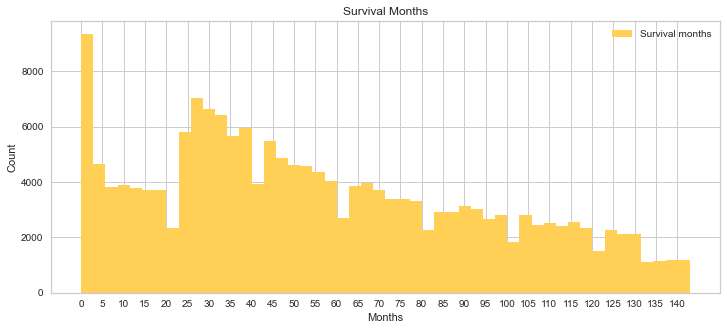

In [270]:
cont_cols.hist(column='Survival months',
        grid=True,
        figsize=(12, 5),
        legend=True,
        bins=50,
        color='#FFCF56');
plt.xticks(np.arange(0, 143, 5))
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Survival Months')

Text(0.5, 1.0, 'Less than 30 months Survival')

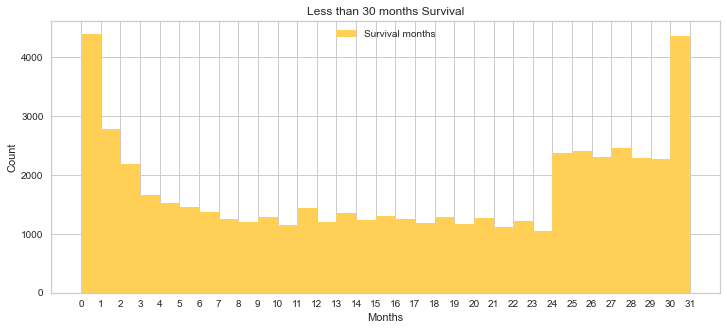

In [271]:
cont_cols_24 = cont_cols[cont_cols['Survival months'] < 32]
cont_cols_24.hist(column='Survival months',
        grid=True,
        figsize=(12, 5),
        legend=True,
        bins=31,
        color='#FFCF56');
plt.xticks(np.arange(0, 32, 1))
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Less than 30 months Survival')

Right skew, median (50.0) slightly lower than mean (56.57), two peaks, 0 and 30 months

Text(0.5, 1.0, 'Regional nodes examined')

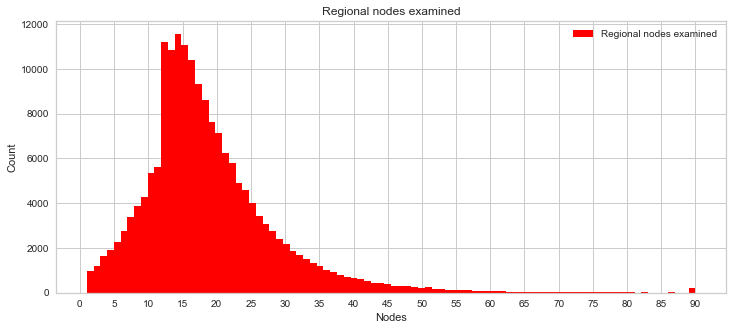

In [272]:
cont_cols.hist(column='Regional nodes examined',
        grid=True,
        figsize=(12, 5),
        legend=True,
        bins=90,
        color='red');
plt.xticks(np.arange(0, 95, 5))
plt.xlabel('Nodes')
plt.ylabel('Count')
plt.title('Regional nodes examined')

Text(0.5, 1.0, 'Regional nodes positive, without "no nodes examined" value')

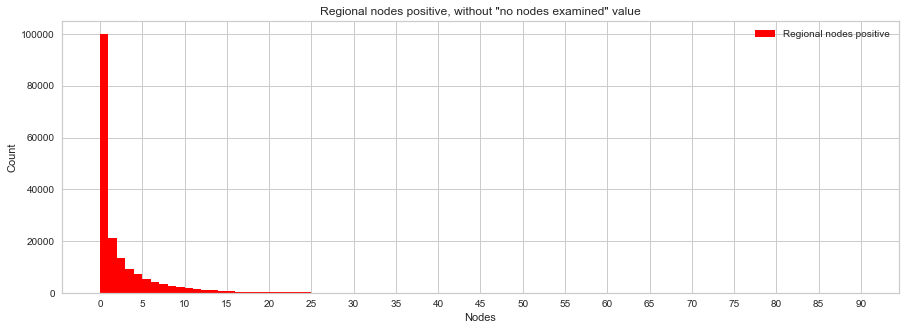

In [273]:
remove98 = data2[data2['Regional nodes positive'] != 98]
remove98.hist(column='Regional nodes positive',
        grid=True,
        figsize=(15, 5),
        legend=True,
        bins=90,
        color='red');
plt.xticks(np.arange(0, 95, 5))
plt.xlabel('Nodes')
plt.ylabel('Count')
plt.title('Regional nodes positive, without "no nodes examined" value')

# Binning

### Creating bins for survival months, 0-23 months, 24-59 months, >=60 months

In [274]:
degrees = ["0-11", "12-23", "24-35", "36-47", "48-59", ">=60"]
column = data2['Survival months']

data2['Survival months_6bins'] = pd.cut(column, [-1, 11, 23, 35, 47, 59, np.inf], labels=degrees)
pd.value_counts(data2['Survival months_6bins'])

>=60     74917
24-35    26789
36-47    22423
0-11     21714
48-59    17984
12-23    14628
Name: Survival months_6bins, dtype: int64

In [275]:
degrees = ["0-29", "30-59", ">=60"]
column = data2['Survival months']

data2['Survival months_3bins'] = pd.cut(column, [-1, 29, 59, np.inf], labels=degrees)
pd.value_counts(data2['Survival months_3bins'])

>=60     74917
30-59    53096
0-29     50442
Name: Survival months_3bins, dtype: int64

### Creating bins for tumor size

000: No mass/tumor found  
001-988: 001 - 988 millimeters (Exact size in mm)  
989: 989 mm or larger  
990: Microscopic focus or foci only, no size of focus given  
991: Described as "less than 1 cm"  
992: Described as "less than 2 cm," or "greater than 1 cm," or "between 1 cm and 2 cm"  
993: Described as "less than 3 cm," or "greater than 2 cm," or "between 2 cm and 3 cm"  
994: Described as "less than 4 cm," or "greater than 3 cm," or "between 3 cm and 4 cm"  
995: Described as "less than 5 cm," or "greater than 4 cm," or "between 4 cm and 5 cm"  
998: Familial/multiple polyposis (M-8220/8221)  
https://staging.seer.cancer.gov/cs/input/02.05.50/colon/size/?breadcrumbs=(~schema_list~),(~view_schema~,~colon~)

In [276]:
data3 = data2.loc[(data2['Tumor Size'] >= 1) & (data2['Tumor Size'] <= 988)].copy()

In [277]:
data4 = data2.loc[(data2['Tumor Size'] == 0) | (data2['Tumor Size'] == 989) | (data2['Tumor Size'] == 990) | (data2['Tumor Size'] == 991) | (data2['Tumor Size'] == 992) | (data2['Tumor Size'] == 993) | (data2['Tumor Size'] == 994) | (data2['Tumor Size'] == 995) | (data2['Tumor Size'] == 998)].copy()

In [278]:
t_degrees = ["1-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-149", "150-199", "200-299", "300-399", "400-499", "500-599", "600-699", "700-799", "800-899", "900-989"]
column = data3['Tumor Size']

data3['Tumor Size'] = pd.cut(column, [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 149, 199, 299, 399, 499, 599, 699, 799, 899, 989], labels=t_degrees)
pd.value_counts(data3['Tumor Size'])

40-49      31552
30-39      31161
50-59      25304
20-29      22743
60-69      17220
10-19      12653
70-79      11152
80-89       7505
100-149     6582
1-9         6340
90-99       4294
150-199      583
200-299      126
300-399       48
500-599       39
400-499       29
900-989       25
800-899       19
700-799       18
600-699       17
Name: Tumor Size, dtype: int64

In [279]:
level_map={0: '0', 990: "Foci only", 991: '1-9', 992: '10-19', 993: '20-29', 994: '30-39', 995: '40-49', 989: '989+', 998: "multiple polyposis"}
data4['Tumor Size']=data4['Tumor Size'].replace(level_map)

In [280]:
data2 = pd.concat([data3, data4])

**Data Description**


| Ordinal | Nominal | Continuous |
|:--|:--|:--|
| Age | Sex | Regional nodes examined
|Grade | Race | Num of in situ/malignant tumors
|Derived AJCC Stage Group | Site | Num of borderline/benign tumors
|Derived AJCC T | Laterality | Regional nodes positive |
|Derived AJCC M | Diagnostic Confirmation |
|Derived AJCC N | Combined Summary Stage 2000 |
|Median household income | Scope Reg Lymph Node Surg |
|Tumor Size| Surg/Rad Seq |
|| Radiation |
|| Systemic/Sur Seq |
|| Chemotherapy |
|| Primary by international rules |
|| Surg Prim Site |
|||

Target: Survival months - Ordinal if binned, Continuous (in months) if not binned, Alive/Dead removed

## Explore values using barplot, histograms, boxplot and value counts

In [281]:
data2["Alive/Dead"].value_counts()

Alive    118223
Dead      60232
Name: Alive/Dead, dtype: int64

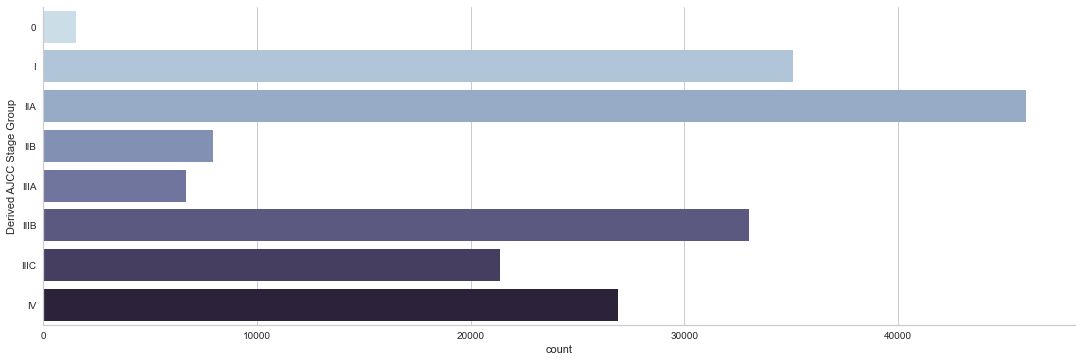

In [282]:
sns.catplot(y="Derived AJCC Stage Group", kind="count", aspect= 3, order=sorted(data2['Derived AJCC Stage Group'].unique()), palette="ch:s=.25, rot=-.25", data=data2)

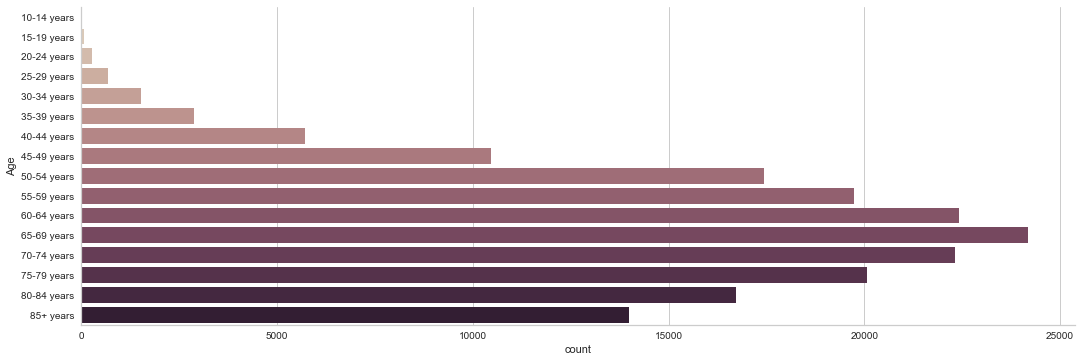

In [283]:
sns.catplot(y="Age", kind="count", aspect = 3, order=sorted(data2.Age.unique()), palette="ch:.25", data=data2)

Non-Hispanic White                            122914
Non-Hispanic Black                             20862
Hispanic (All Races)                           18878
Non-Hispanic Asian or Pacific Islander         14606
Non-Hispanic American Indian/Alaska Native      1195
Name: Race, dtype: int64

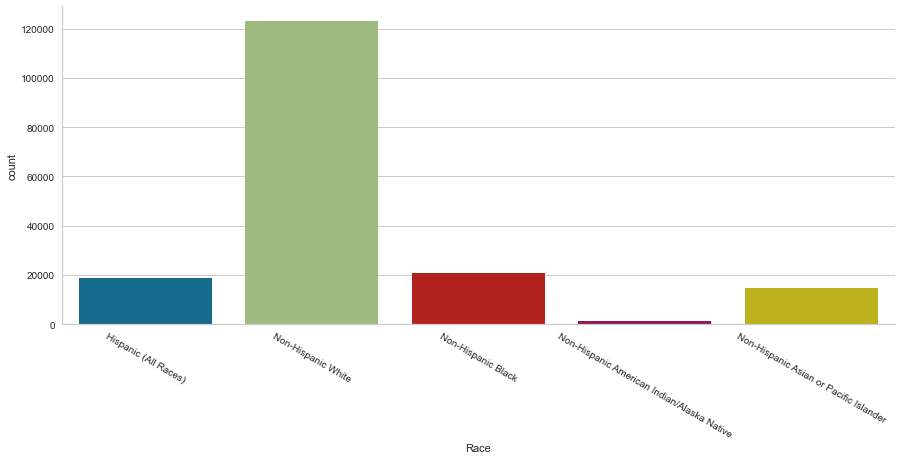

In [284]:
g = sns.catplot(x="Race", kind="count", aspect=2.5, data=data2)
g.set_xticklabels(rotation=-30)
data2["Race"].value_counts()

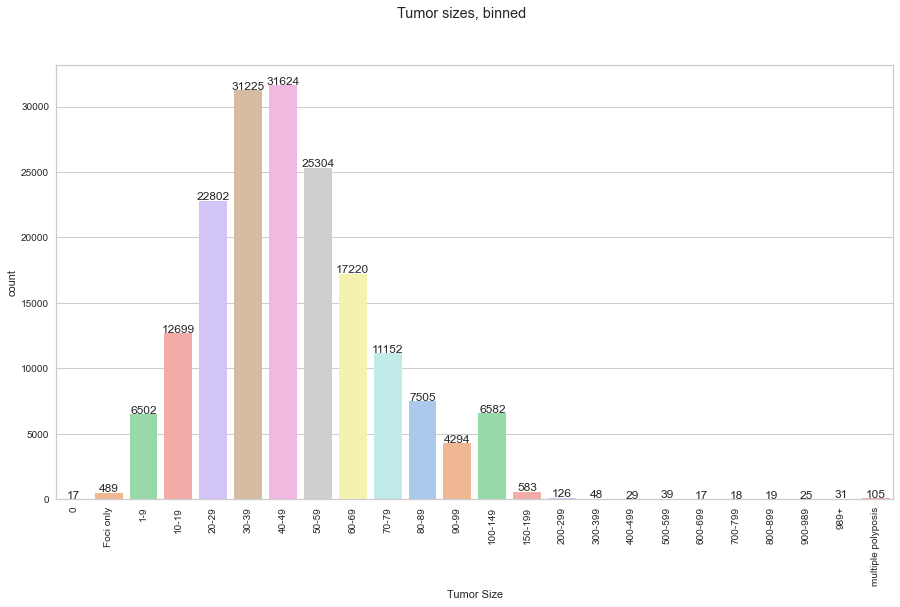

In [285]:
plt.figure(figsize=(15,8))
graph = sns.countplot(x="Tumor Size", palette = 'pastel', data=data2, order=['0','Foci only','1-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-149','150-199','200-299','300-399','400-499','500-599','600-699','700-799','800-899','900-989','989+','multiple polyposis'])
graph.figure.suptitle('Tumor sizes, binned')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+60), ha="center")
plt.show()

### Outliers in Tumor Size vs Survival months

In [286]:
data2['ts_150plus'] = data2['Tumor Size'][data2['Tumor Size'].isin(['150-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-989', '989+'])]

In [287]:
data5 = data2.copy()

In [288]:
data2 = data2.drop(columns=['ts_150plus'])

In [289]:
data5 = data5[data5['ts_150plus'].notna()]

Text(0.5, 0.98, 'Survival months, 3 ranges')

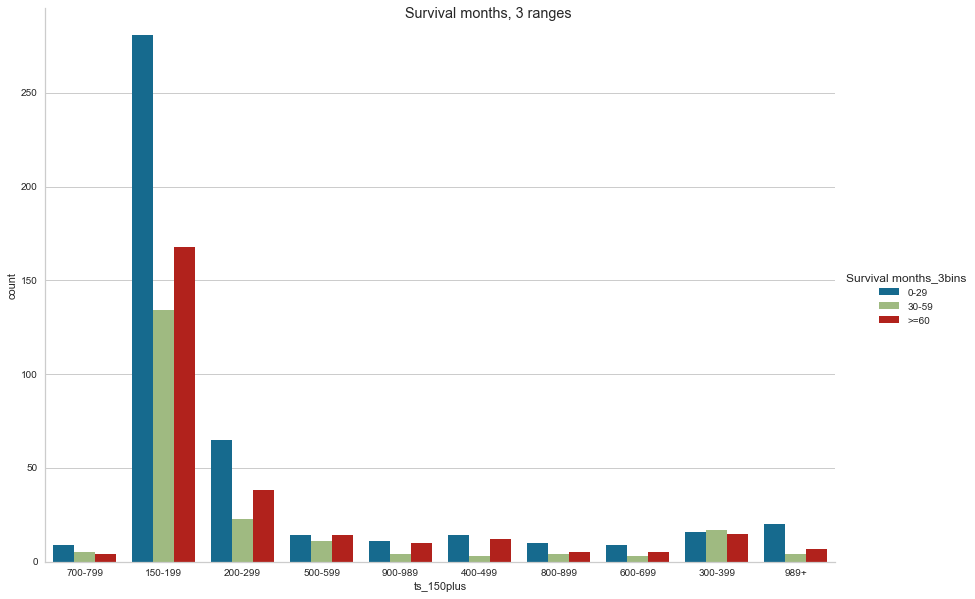

In [290]:
splt = sns.catplot(hue="Survival months_3bins", x="ts_150plus", kind="count", data=data5, height=8.27, aspect=11.7/8.27)
splt.fig.suptitle('Survival months, 3 ranges')

Text(0.5, 0.98, 'Survival months, tumor size above 150')

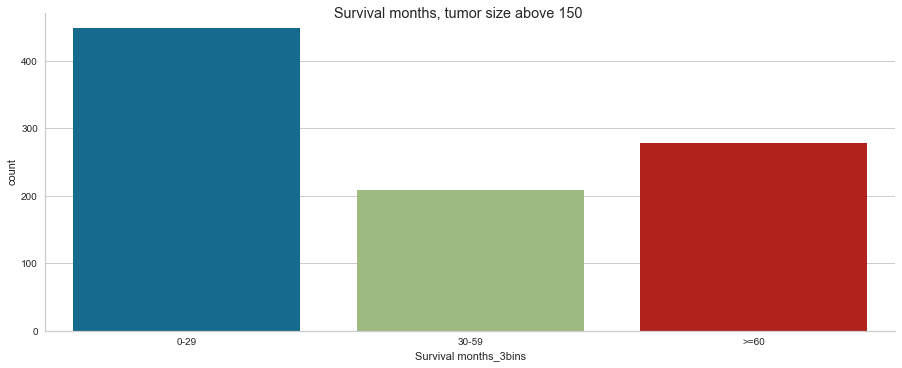

In [291]:
splt = sns.catplot(x="Survival months_3bins", kind="count", aspect = 2.5, data=data5)
splt.fig.suptitle('Survival months, tumor size above 150')

Text(0.5, 0.98, 'Survival months, 3 ranges')

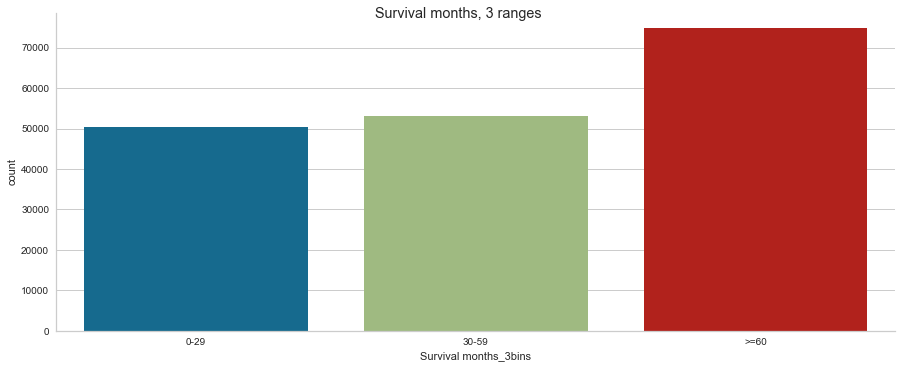

In [292]:
splt = sns.catplot(x="Survival months_3bins", kind="count", aspect=2.5, data=data2)
splt.fig.suptitle('Survival months, 3 ranges')

Text(0.5, 0.98, 'Survival months, 6 ranges')

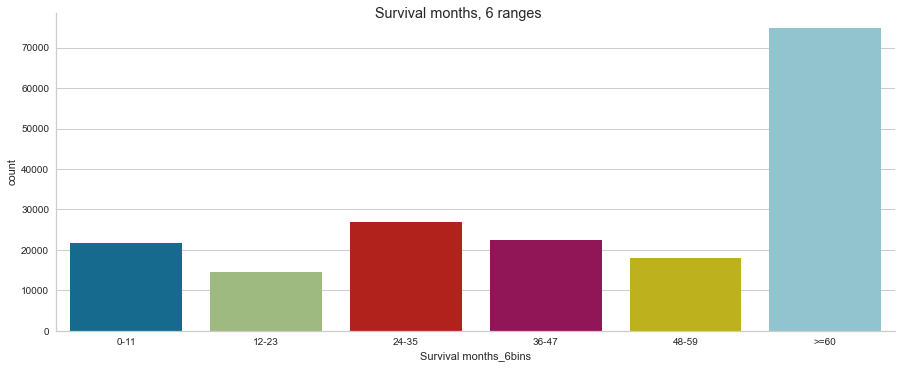

In [293]:
splt = sns.catplot(x="Survival months_6bins", kind="count", aspect=2.5, data=data2)
splt.fig.suptitle('Survival months, 6 ranges')

## Encode ordinal and nominal categorical data

### Ordinal

In [294]:
for col in data2:
    print(data2[col].unique())

['35-39 years' '70-74 years' '40-44 years' '80-84 years' '85+ years'
 '60-64 years' '65-69 years' '50-54 years' '55-59 years' '75-79 years'
 '45-49 years' '30-34 years' '25-29 years' '15-19 years' '20-24 years'
 '10-14 years']
['Female' 'Male']
['Hispanic (All Races)' 'Non-Hispanic White' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native'
 'Non-Hispanic Asian or Pacific Islander']
['Rectosigmoid Junction' 'Ascending Colon' 'Sigmoid Colon'
 'Transverse Colon' 'Hepatic Flexure' 'Rectum' 'Cecum' 'Descending Colon'
 'Splenic Flexure' 'Appendix' 'Large Intestine, NOS']
['Grade II: Moderately differentiated' 'Grade III: Poorly differentiated'
 'Grade I: Well differentiated' 'Grade IV: Undifferentiated; anaplastic']
['Not a paired  site' 'Right - origin of primary'
 'Left - origin of primary'
 'Paired site, but no information concerning laterality'
 'Only one side - side unspecified' 'Bilateral, single primary']
['Positive histology' 'Positive microscopic confirm, method not s

## Split data into ordinal, nominal or continuous categories

In [295]:
from sklearn.preprocessing import OrdinalEncoder

In [296]:
l_m = {'0':0,'Foci only':1, '1-9':2, '10-19':3, '20-29':4, '30-39':5,'40-49':6,'50-59':7,'60-69':8, '70-79':9 , '80-89':10, '90-99':11, '100-149':12, '150-199':13, '200-299':14, '300-399':15, '400-499':16, '500-599':17, '600-699':18, '700-799': 19, '800-899':20, '900-989':21, '989+':22,  'multiple polyposis':23}
data2['Tumor Size']=data2['Tumor Size'].replace(l_m)

In [297]:
level_mapping={'T0':0, 'Tis':1, 'T1':2, 'T2':3, 'T3':4, 'T4':5}
data2['Derived AJCC T']=data2['Derived AJCC T'].replace(level_mapping)

In [298]:
enc = OrdinalEncoder()
enc.fit(data2[["Age", "Grade", "Derived AJCC Stage Group", "Derived AJCC M", "Derived AJCC N", "Median household income", "Survival months"]])
data2[["Age", "Grade", "Derived AJCC Stage Group", "Derived AJCC M", "Derived AJCC N", "Median household income", "Survival months"]] = enc.transform(data2[["Age", "Grade", "Derived AJCC Stage Group", "Derived AJCC M", "Derived AJCC N", "Median household income", "Survival months"]]).astype(int)

In [299]:
data2[['Age','Grade','Derived AJCC Stage Group', 'Derived AJCC T', 'Derived AJCC M', 'Derived AJCC N', 'Median household income', 'Survival months', 'Tumor Size']].head(20)

,Age,Grade,Derived AJCC Stage Group,Derived AJCC T,Derived AJCC M,Derived AJCC N,Median household income,Survival months,Tumor Size
0,5,1,7,4,1,1,9,119,5
1,12,1,4,2,0,1,9,74,3
2,6,1,1,3,0,0,9,127,5
3,14,1,1,3,0,0,9,0,6
4,15,1,2,4,0,0,9,26,5
5,10,1,7,4,1,0,9,29,10
6,12,1,2,4,0,0,9,113,5
7,14,2,7,5,1,2,9,0,8
8,11,1,2,4,0,0,9,49,6
9,15,0,2,4,0,0,9,83,7


### Nominal

In [300]:
sorted(data2.Sex.unique())

['Female', 'Male']

In [301]:
from sklearn import preprocessing
from collections import defaultdict

In [302]:
import joblib

In [303]:
dic = defaultdict(preprocessing.LabelEncoder)

In [304]:
le = preprocessing.LabelEncoder()

In [305]:
data2[['Sex', 'Race', 'Site', 'Laterality', 'Diagnostic Confirmation', 'Combined Summary Stage 2000', 'Scope Reg Lymph Node Surg', 'Surg/Rad Seq', 'Radiation', 'Chemotherapy', 'Systemic/Sur Seq', 'Alive/Dead', 'Primary by international rules']] = data2[['Sex', 'Race', 'Site', 'Laterality', 'Diagnostic Confirmation', 'Combined Summary Stage 2000', 'Scope Reg Lymph Node Surg', 'Surg/Rad Seq', 'Radiation', 'Chemotherapy', 'Systemic/Sur Seq', 'Alive/Dead', 'Primary by international rules']].apply(lambda x: dic[x.name].fit_transform(x))

In [306]:
for k in dic:
    nom_dict = pd.DataFrame.from_dict(dict(zip(dic[k].classes_, le.fit_transform(dic[k].classes_, ))), orient='index')
    print(nom_dict)

        0
Female  0
Male    1
                                            0
Hispanic (All Races)                        0
Non-Hispanic American Indian/Alaska Native  1
Non-Hispanic Asian or Pacific Islander      2
Non-Hispanic Black                          3
Non-Hispanic White                          4
                        0
Appendix                0
Ascending Colon         1
Cecum                   2
Descending Colon        3
Hepatic Flexure         4
Large Intestine, NOS    5
Rectosigmoid Junction   6
Rectum                  7
Sigmoid Colon           8
Splenic Flexure         9
Transverse Colon       10
                                                    0
Bilateral, single primary                           0
Left - origin of primary                            1
Not a paired  site                                  2
Only one side - side unspecified                    3
Paired site, but no information concerning late...  4
Right - origin of primary                           5
    

In [307]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178455 entries, 0 to 178324
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Age                              178455 non-null  int64   
 1   Sex                              178455 non-null  int32   
 2   Race                             178455 non-null  int32   
 3   Site                             178455 non-null  int32   
 4   Grade                            178455 non-null  int64   
 5   Laterality                       178455 non-null  int32   
 6   Diagnostic Confirmation          178455 non-null  int32   
 7   Combined Summary Stage 2000      178455 non-null  int32   
 8   Derived AJCC Stage Group         178455 non-null  int64   
 9   Derived AJCC T                   178455 non-null  int64   
 10  Derived AJCC N                   178455 non-null  int64   
 11  Derived AJCC M                   178455 non-null  in

# Cluster

## Determine K

In [308]:
data_no_tar = data2.drop(['Alive/Dead', 'Survival months', 'Survival months_6bins', 'Survival months_3bins'],axis=1)

In [309]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [310]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_no_tar)
    Sum_of_squared_distances.append(km.inertia_)

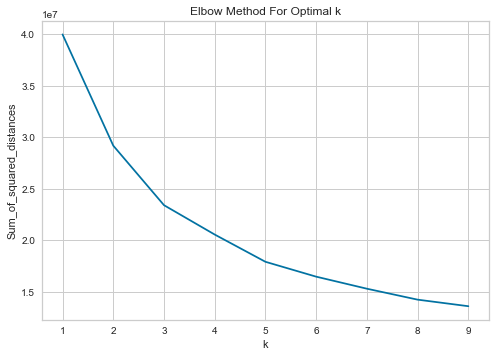

In [311]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [312]:
from sklearn.metrics import silhouette_score

In [313]:
!pip install yellowbrick

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Gchan\\AppData\\Roaming\\Python\\Python38\\site-packages\\~-mpy\\.libs\\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [314]:
from yellowbrick.cluster import KElbowVisualizer

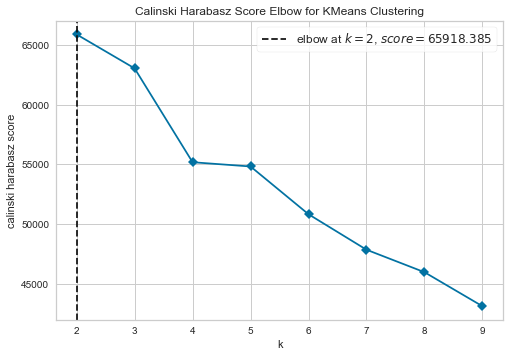

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [315]:
model = KMeans(random_state=10)

visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(data_no_tar)    
visualizer.poof()

## Train: 70%, Test: 30%

### Train Test Split for Continous Target Variable

In [316]:
from sklearn.model_selection import train_test_split

X = data2.drop(['Alive/Dead', 'Survival months', 'Survival months_6bins', 'Survival months_3bins'],axis=1)
yc = data2['Survival months']

X_train, X_test, yc_train, yc_test = train_test_split(X, yc, test_size=0.30, random_state=42)

### Train Test Split for Categorical Target Variable (6 ranges)

In [317]:
from sklearn.model_selection import train_test_split

X = data2.drop(['Alive/Dead', 'Survival months', 'Survival months_6bins', 'Survival months_3bins'],axis=1)
y6 = data2['Survival months_6bins']

X_train, X_test, y6_train, y6_test = train_test_split(X, y6, test_size=0.30, random_state=42)

### Train Test Split for Categorical Target Variable (3 ranges)

In [318]:
from sklearn.model_selection import train_test_split

X = data2.drop(['Alive/Dead', 'Survival months', 'Survival months_6bins', 'Survival months_3bins'],axis=1)
y3 = data2['Survival months_3bins']

X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.30, random_state=42)

## Feature Selection Categorical and Continuous

In [319]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [320]:
def select_features(X_train, yc_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=10)
    fs.fit(X_train, yc_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)
    return X_train, X_test, fs

In [321]:
from matplotlib import pyplot
X_train_fs, X_test_fs, fs = select_features(X_train, yc_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3341.869384
Feature 1: 0.158846
Feature 2: 63.227753
Feature 3: 187.850470
Feature 4: 2795.734927
Feature 5: 58.072245
Feature 6: 4.611209
Feature 7: 2273.263438
Feature 8: 15833.881736
Feature 9: 8261.457387
Feature 10: 9553.015455
Feature 11: 14870.292103
Feature 12: 287.648354
Feature 13: 53.469276
Feature 14: 155.708249
Feature 15: 252.876811
Feature 16: 17.970250
Feature 17: 6.527737
Feature 18: 11.434725
Feature 19: 8407.761142
Feature 20: 2675.560261
Feature 21: 111.478329
Feature 22: 5.497795
Feature 23: 0.705748
Feature 24: 359.754325


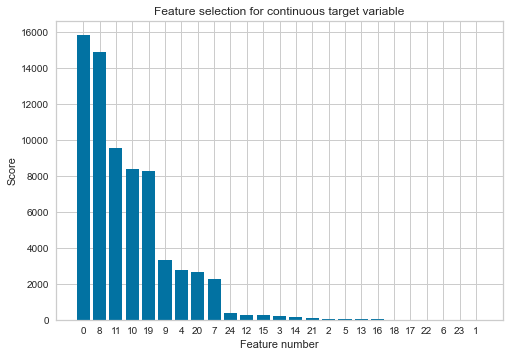

In [322]:
pyplot.bar([i for i in range(len(fs.scores_))], sorted(fs.scores_, reverse=True))
plt.title('Feature selection for continuous target variable')
x = [i for i in range(len(fs.scores_))]
plt.xticks(x, ('0','8','11','10','19','9','4','20','7','24','12','15','3','14','21','2','5','13','16','18','17','22','6','23','1'))
plt.xlabel("Feature number")
plt.ylabel("Score")
pyplot.show()

In [323]:
list(X_train.columns[[0,8,11,10,19,9,4,20,7,24]])

['Age',
 'Derived AJCC Stage Group',
 'Derived AJCC M',
 'Derived AJCC N',
 'Regional nodes positive',
 'Derived AJCC T',
 'Grade',
 'Tumor Size',
 'Combined Summary Stage 2000',
 'Median household income']

In [324]:
def select_features(X_train, y6_train, X_test):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_train, y6_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)
    return X_train, X_test, fs

In [325]:
from matplotlib import pyplot
X_train_fs, X_test_fs, fs = select_features(X_train, y6_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3452.790745
Feature 1: 49.443936
Feature 2: 66.867813
Feature 3: 727.274255
Feature 4: 1360.808405
Feature 5: 1.190858
Feature 6: 0.001788
Feature 7: 3610.753727
Feature 8: 24000.489069
Feature 9: 1930.583346
Feature 10: 10940.673370
Feature 11: 15854.510482
Feature 12: 706.094568
Feature 13: 12.479379
Feature 14: 223.683184
Feature 15: 187.283569
Feature 16: 1655.552565
Feature 17: 1281.924591
Feature 18: 3586.180564
Feature 19: 97175.777622
Feature 20: 3839.704307
Feature 21: 3.642851
Feature 22: 6.773290
Feature 23: 11.516848
Feature 24: 314.758378


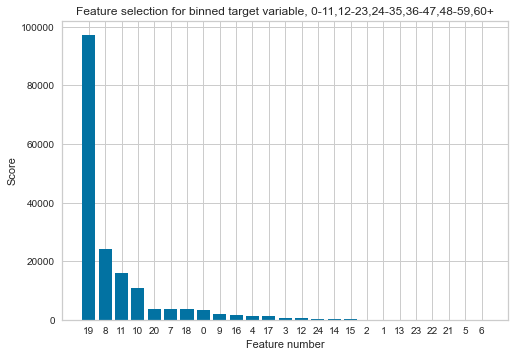

In [326]:
pyplot.bar([i for i in range(len(fs.scores_))], sorted(fs.scores_, reverse=True))
plt.title('Feature selection for binned target variable, 0-11,12-23,24-35,36-47,48-59,60+')
x = [i for i in range(len(fs.scores_))]
plt.xticks(x, (19,8,11,10,20,7,18,0,9,16,4,17,3,12,24,14,15,2,1,13,23,22,21,5,6))
plt.xlabel("Feature number")
plt.ylabel("Score")
pyplot.show()

In [327]:
list(X_train.columns[[19,8,11,10,20,7,18,0,9,16]])

['Regional nodes positive',
 'Derived AJCC Stage Group',
 'Derived AJCC M',
 'Derived AJCC N',
 'Tumor Size',
 'Combined Summary Stage 2000',
 'Regional nodes examined',
 'Age',
 'Derived AJCC T',
 'Chemotherapy']

In [328]:
def select_features(X_train, y3_train, X_test):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_train, y3_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)
    return X_train, X_test, fs

In [329]:
from matplotlib import pyplot
X_train_fs, X_test_fs, fs = select_features(X_train, y3_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 2205.073576
Feature 1: 25.557572
Feature 2: 33.599679
Feature 3: 501.420561
Feature 4: 1064.582537
Feature 5: 0.919516
Feature 6: 0.001241
Feature 7: 2981.206025
Feature 8: 21140.491621
Feature 9: 1696.177072
Feature 10: 9514.266876
Feature 11: 13544.361431
Feature 12: 535.730967
Feature 13: 8.965150
Feature 14: 135.191786
Feature 15: 127.794992
Feature 16: 217.353613
Feature 17: 212.678125
Feature 18: 2000.709814
Feature 19: 79891.861382
Feature 20: 3098.061187
Feature 21: 3.195903
Feature 22: 1.599593
Feature 23: 7.178476
Feature 24: 248.383432


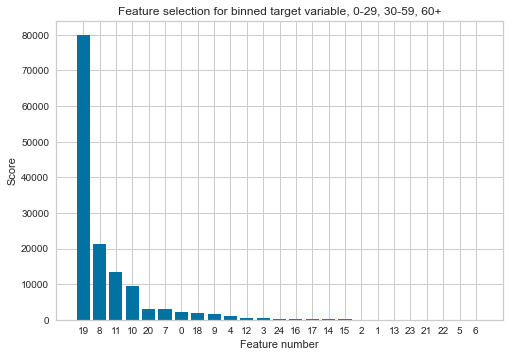

In [330]:
pyplot.bar([i for i in range(len(fs.scores_))], sorted(fs.scores_, reverse=True))
plt.title('Feature selection for binned target variable, 0-29, 30-59, 60+')
x = [i for i in range(len(fs.scores_))]
plt.xticks(x, (19,8,11,10,20,7,0,18,9,4,12,3,24,16,17,14,15,2,1,13,23,21,22,5,6))
plt.xlabel("Feature number")
plt.ylabel("Score")
pyplot.show()

In [331]:
list(X_train.columns[[19,8,11,10,20,7,0,18,9,4]])

['Regional nodes positive',
 'Derived AJCC Stage Group',
 'Derived AJCC M',
 'Derived AJCC N',
 'Tumor Size',
 'Combined Summary Stage 2000',
 'Age',
 'Regional nodes examined',
 'Derived AJCC T',
 'Grade']

# HDBSCAN for classification only (3 bins)

In [332]:
!pip install --user numpy==1.20.0

  Using cached numpy-1.20.0-cp38-cp38-win_amd64.whl (13.7 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you'll have numpy 1.20.0 which is incompatible.


In [333]:
!pip install hdbscan --no-build-isolation --no-binary :all:

In [334]:
import hdbscan

In [335]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, prediction_data=True)

In [336]:
HX_train_clstrs = X_train.copy()

In [337]:
clusterer.fit(HX_train_clstrs)

HDBSCAN(min_cluster_size=300, prediction_data=True)

In [338]:
HX_train_clstrs['Clusters']=clusterer.labels_

In [443]:
clusterer.labels_.max()

2

In [340]:
HX_test_clstrs = X_test.copy()

In [341]:
htest_labels = hdbscan.approximate_predict(clusterer, HX_test_clstrs)

In [342]:
htest_labels = htest_labels[0]

In [343]:
HX_test_clstrs['Clusters'] = htest_labels

In [344]:
HX_train_clstrs['Clusters'].value_counts()

 1    55085
 2    54274
-1    11036
 0     4523
Name: Clusters, dtype: int64

In [345]:
HX_test_clstrs['Clusters'].value_counts()

 2    23451
 1    23410
-1     4776
 0     1900
Name: Clusters, dtype: int64

In [346]:
HX_train_clstrs

,Age,Sex,Race,Site,Grade,Laterality,Diagnostic Confirmation,Combined Summary Stage 2000,Derived AJCC Stage Group,Derived AJCC T,...,Chemotherapy,Systemic/Sur Seq,Regional nodes examined,Regional nodes positive,Tumor Size,Primary by international rules,Num of in situ/malignant tumors,Num of benign/borderline tumors,Median household income,Clusters
54478,9,1,3,2,1,2,4,1,2,4,...,0,2,12,0,6,1,1,0,3,2
20793,11,0,4,1,1,2,4,4,4,3,...,1,4,20,2,4,1,1,0,3,1
41087,15,1,4,9,2,2,4,0,7,5,...,1,4,9,8,10,1,2,0,9,-1
103928,9,1,4,1,1,5,4,4,6,4,...,0,2,27,19,9,1,1,0,5,-1
32018,15,1,4,1,1,2,4,1,1,2,...,0,2,12,0,5,1,1,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120550,8,1,4,2,1,2,4,0,7,5,...,1,4,30,4,11,1,3,0,4,-1
104290,8,0,4,8,1,2,4,4,6,4,...,1,4,25,18,6,1,2,0,9,-1
132695,11,0,4,3,2,2,4,4,5,4,...,1,4,23,1,6,1,1,0,4,2
147708,10,1,4,7,1,2,4,3,2,4,...,1,4,14,0,5,1,1,0,9,2


In [347]:
HX_train_clstrs = pd.concat([HX_train_clstrs, y3_train], axis=1)

In [348]:
HX_test_clstrs = pd.concat([HX_test_clstrs, y3_test], axis=1)

In [349]:
HX_train_clstrs = HX_train_clstrs[HX_train_clstrs['Clusters'] != -1]

In [350]:
HX_test_clstrs = HX_test_clstrs[HX_test_clstrs['Clusters'] != -1]

In [351]:
HX_train_clstrs

,Age,Sex,Race,Site,Grade,Laterality,Diagnostic Confirmation,Combined Summary Stage 2000,Derived AJCC Stage Group,Derived AJCC T,...,Systemic/Sur Seq,Regional nodes examined,Regional nodes positive,Tumor Size,Primary by international rules,Num of in situ/malignant tumors,Num of benign/borderline tumors,Median household income,Clusters,Survival months_3bins
54478,9,1,3,2,1,2,4,1,2,4,...,2,12,0,6,1,1,0,3,2,0-29
20793,11,0,4,1,1,2,4,4,4,3,...,4,20,2,4,1,1,0,3,1,>=60
32018,15,1,4,1,1,2,4,1,1,2,...,2,12,0,5,1,1,0,4,2,0-29
125347,7,0,4,0,0,2,4,3,3,5,...,2,9,0,6,1,1,0,4,1,>=60
72515,14,0,4,3,2,2,4,0,7,4,...,2,18,11,5,1,2,1,6,1,0-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138127,13,1,3,3,1,2,4,0,7,5,...,4,13,4,10,1,1,0,1,2,0-29
55219,7,0,3,8,1,2,4,0,7,4,...,4,27,1,7,1,1,0,6,0,0-29
110893,12,1,4,6,1,2,4,2,5,4,...,4,46,1,7,1,2,0,5,2,30-59
132695,11,0,4,3,2,2,4,4,5,4,...,4,23,1,6,1,1,0,4,2,>=60


In [352]:
Hy3_train = HX_train_clstrs['Survival months_3bins']

In [353]:
Hy3_test = HX_test_clstrs['Survival months_3bins']

In [354]:
HX_test_clstrs = HX_test_clstrs.drop(['Survival months_3bins'],axis=1)

In [355]:
HX_train_clstrs = HX_train_clstrs.drop(['Survival months_3bins'],axis=1)

In [356]:
HX_test_clstrs

,Age,Sex,Race,Site,Grade,Laterality,Diagnostic Confirmation,Combined Summary Stage 2000,Derived AJCC Stage Group,Derived AJCC T,...,Chemotherapy,Systemic/Sur Seq,Regional nodes examined,Regional nodes positive,Tumor Size,Primary by international rules,Num of in situ/malignant tumors,Num of benign/borderline tumors,Median household income,Clusters
4918,8,1,4,8,1,2,4,1,1,2,...,0,2,14,0,2,1,1,0,9,2
172211,14,0,4,1,1,2,4,1,1,3,...,0,2,18,0,5,1,1,0,1,1
89775,10,1,4,8,1,2,4,1,2,4,...,0,2,17,0,6,1,1,0,9,2
111852,8,0,3,1,0,2,4,1,0,1,...,0,2,19,0,1,1,1,0,5,1
171367,7,1,3,9,1,2,4,2,5,5,...,1,4,22,3,9,1,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37676,9,0,4,7,1,2,4,0,7,4,...,1,4,23,16,8,1,1,0,2,2
19082,12,0,4,1,1,2,4,2,6,4,...,0,2,17,4,4,1,1,0,3,1
87315,14,0,4,7,2,2,4,4,6,3,...,1,4,15,4,6,1,2,0,5,2
102915,14,0,2,8,1,2,4,1,1,3,...,0,2,16,0,6,1,2,0,8,1


## Scaling HDBSCAN Clustered Data

In [357]:
from sklearn.preprocessing import StandardScaler
def scale_features(HX_train_clstrs: pd.DataFrame, HX_test_clstrs: pd.DataFrame):
    sc = StandardScaler()
    HX_train_clstrs = sc.fit_transform(HX_train_clstrs)
    HX_test_clstrs = sc.transform (HX_test_clstrs)
    
    return HX_train_clstrs, HX_test_clstrs
HX_train_scaled, HX_test_scaled = scale_features(HX_train_clstrs, HX_test_clstrs)

In [358]:
HX_train_scaled = pd.DataFrame(HX_train_scaled, index=HX_train_clstrs.index, columns=HX_train_clstrs.columns)

In [359]:
HX_test_scaled = pd.DataFrame(HX_test_scaled, index=HX_test_clstrs.index, columns=HX_test_clstrs.columns)

## Split Data into 0, 1, 2 , 3 and base Clusters

In [440]:
HX_test_scaled['Clusters'].value_counts()

 0.987126    23451
-0.765785    23410
-2.518696     1900
Name: Clusters, dtype: int64

In [441]:
# locate the "0" cluster
HX_train0 = HX_train_scaled[(HX_train_scaled['Clusters'] > -3) & (HX_train_scaled['Clusters'] < -1)]
HX_test0 = HX_test_scaled[(HX_test_scaled['Clusters'] > -3) & (HX_test_scaled['Clusters'] < -1)]
Hy3_train0 = Hy3_train[(HX_train_scaled['Clusters'] > -3) & (HX_train_scaled['Clusters'] < -1)]
Hy3_test0 = Hy3_test[(HX_test_scaled['Clusters'] > -3) & (HX_test_scaled['Clusters'] < -1)]

# locate the "1" cluster
HX_train1 = HX_train_scaled[(HX_train_scaled['Clusters'] > -1) & (HX_train_scaled['Clusters'] < -0)]
HX_test1 = HX_test_scaled[(HX_test_scaled['Clusters'] > -1) & (HX_test_scaled['Clusters'] < -0)]
Hy3_train1 = Hy3_train[(HX_train_scaled['Clusters'] > -1) & (HX_train_scaled['Clusters'] < -0)]
Hy3_test1 = Hy3_test[(HX_test_scaled['Clusters'] > -1) & (HX_test_scaled['Clusters'] < -0)]

# locate the "2" cluster
HX_train2 = HX_train_scaled[HX_train_scaled['Clusters'] > 0]
HX_test2 = HX_test_scaled[HX_test_scaled['Clusters'] > 0]
Hy3_train2 = Hy3_train[HX_train_scaled['Clusters'] > 0]
Hy3_test2 = Hy3_test[HX_test_scaled['Clusters'] > 0]

# drop cluster from the base dataset 
HX_train_base = HX_train_scaled.drop(columns=['Clusters'])
HX_test_base = HX_test_scaled.drop(columns=['Clusters'])
Hy3_train_base = Hy3_train.copy()
Hy3_test_base = Hy3_test.copy()

In [442]:
datasets = {
    'base': (HX_train_base, Hy3_train_base, HX_test_base, Hy3_test_base),
    'cluster-0': (HX_train0, Hy3_train0, HX_test0, Hy3_test0),
    'cluster-1': (HX_train1, Hy3_train1, HX_test1, Hy3_test1),
    'cluster-2': (HX_train2, Hy3_train2, HX_test2, Hy3_test2),
}

## LogReg

#### LogReg on Survival months (3 ranges) using HDBSCAN clusters

In [371]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(HX_train_base, Hy3_train_base)
predictions = lrmodel.predict(HX_test_base)
print(accuracy_score(Hy3_test_base, predictions))
print(confusion_matrix(Hy3_test_base, predictions))
print(classification_report(Hy3_test_base, predictions, digits=3))

0.5157195299522159
[[ 8224  1937  2930]
 [ 4108  3928  6650]
 [ 3409  4580 12995]]
              precision    recall  f1-score   support

        0-29      0.522     0.628     0.570     13091
       30-59      0.376     0.267     0.313     14686
        >=60      0.576     0.619     0.597     20984

    accuracy                          0.516     48761
   macro avg      0.491     0.505     0.493     48761
weighted avg      0.501     0.516     0.504     48761



In [372]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(HX_train0, Hy3_train0)
predictions = lrmodel.predict(HX_test0)
print(accuracy_score(Hy3_test0, predictions))
print(confusion_matrix(Hy3_test0, predictions))
print(classification_report(Hy3_test0, predictions, digits=3))

0.46
[[266 100 104]
 [199 192 256]
 [195 172 416]]
              precision    recall  f1-score   support

        0-29      0.403     0.566     0.471       470
       30-59      0.414     0.297     0.346       647
        >=60      0.536     0.531     0.534       783

    accuracy                          0.460      1900
   macro avg      0.451     0.465     0.450      1900
weighted avg      0.462     0.460     0.454      1900



In [373]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(HX_train1, Hy3_train1)
predictions = lrmodel.predict(HX_test1)
print(accuracy_score(Hy3_test1, predictions))
print(confusion_matrix(Hy3_test1, predictions))
print(classification_report(Hy3_test1, predictions, digits=3))

0.5273814609141393
[[4373 1100 1455]
 [1750 1885 3133]
 [1396 2230 6088]]
              precision    recall  f1-score   support

        0-29      0.582     0.631     0.605      6928
       30-59      0.361     0.279     0.315      6768
        >=60      0.570     0.627     0.597      9714

    accuracy                          0.527     23410
   macro avg      0.504     0.512     0.506     23410
weighted avg      0.513     0.527     0.518     23410



In [374]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(HX_train2, Hy3_train2)
predictions = lrmodel.predict(HX_test2)
print(accuracy_score(Hy3_test2, predictions))
print(confusion_matrix(Hy3_test2, predictions))
print(classification_report(Hy3_test2, predictions, digits=3))

0.5051383736301224
[[3504  832 1357]
 [2128 1925 3218]
 [1798 2272 6417]]
              precision    recall  f1-score   support

        0-29      0.472     0.615     0.534      5693
       30-59      0.383     0.265     0.313      7271
        >=60      0.584     0.612     0.598     10487

    accuracy                          0.505     23451
   macro avg      0.479     0.497     0.482     23451
weighted avg      0.494     0.505     0.494     23451



## K-means clustering, only done once as only done on training dataset without any target variables

In [376]:
from typing import Tuple

In [377]:
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:

    clustering = KMeans(n_clusters=n_clusters, random_state=1022)
    clustering.fit(X_train)

    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels
    

    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    
    return X_train_clstrs, X_test_clstrs

In [378]:
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 2)

## Scaling K means Clustered Data

In [379]:
from sklearn.preprocessing import StandardScaler
def scale_features(X_train_clstrs: pd.DataFrame, X_test_clstrs: pd.DataFrame):
    sc = StandardScaler()
    X_train_clstrs = sc.fit_transform(X_train_clstrs)
    X_test_clstrs = sc.transform (X_test_clstrs)
    
    return X_train_clstrs, X_test_clstrs
X_train_scaled, X_test_scaled = scale_features(X_train_clstrs, X_test_clstrs)

In [380]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_clstrs.index, columns=X_train_clstrs.columns)

In [381]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test_clstrs.index, columns=X_test_clstrs.columns)

## Split Data into 0, 1 and base Clusters

In [382]:
# locate the "0" cluster
X_train0 = X_train_scaled[X_train_scaled['clusters'] < 0]
X_test0 = X_test_scaled[X_test_scaled['clusters'] < 0]
yc_train0 = yc_train[X_train_scaled['clusters'] < 0]
yc_test0 = yc_test[X_test_scaled['clusters'] < 0]
y6_train0 = y6_train[X_train_scaled['clusters'] < 0]
y6_test0 = y6_test[X_test_scaled['clusters'] < 0]
y3_train0 = y3_train[X_train_scaled['clusters'] < 0]
y3_test0 = y3_test[X_test_scaled['clusters'] < 0]

# locate the "1" cluster
X_train1 = X_train_scaled[X_train_scaled['clusters'] > 0]
X_test1 = X_test_scaled[X_test_scaled['clusters'] > 0]
yc_train1 = yc_train[X_train_scaled['clusters'] > 0]
yc_test1 = yc_test[X_test_scaled['clusters'] > 0]
y6_train1 = y6_train[X_train_scaled['clusters'] > 0]
y6_test1 = y6_test[X_test_scaled['clusters'] > 0]
y3_train1 = y3_train[X_train_scaled['clusters'] > 0]
y3_test1 = y3_test[X_test_scaled['clusters'] > 0]

# drop cluster from the base dataset 
X_train_base = X_train_scaled.drop(columns=['clusters'])
X_test_base = X_test_scaled.drop(columns=['clusters'])
yc_train_base = yc_train.copy()
yc_test_base = yc_test.copy()
y6_train_base = y6_train.copy()
y6_test_base = y6_test.copy()
y3_train_base = y3_train.copy()
y3_test_base = y3_test.copy()

In [383]:
datasets = {
    'base': (X_train_base, yc_train_base, X_test_base, yc_test_base),
    'base': (X_train_base, y6_train_base, X_test_base, y6_test_base),
    'base': (X_train_base, y3_train_base, X_test_base, y3_test_base),
    'cluster-0': (X_train0, yc_train0, X_test0, yc_test0),
    'cluster-1': (X_train1, yc_train1, X_test1, yc_test1),
    'cluster-0': (X_train0, y6_train0, X_test0, y6_test0),
    'cluster-1': (X_train1, y6_train1, X_test1, y6_test1),
    'cluster-0': (X_train0, y3_train0, X_test0, y3_test0),
    'cluster-1': (X_train1, y3_train1, X_test1, y3_test1),
}

In [384]:
X_train_base

,Age,Sex,Race,Site,Grade,Laterality,Diagnostic Confirmation,Combined Summary Stage 2000,Derived AJCC Stage Group,Derived AJCC T,...,Radiation,Chemotherapy,Systemic/Sur Seq,Regional nodes examined,Regional nodes positive,Tumor Size,Primary by international rules,Num of in situ/malignant tumors,Num of benign/borderline tumors,Median household income
54478,-0.632680,0.990677,-0.211157,-0.980446,-0.264494,-0.065439,0.005682,-0.597746,-0.763646,0.230815,...,0.264631,-0.854862,-0.804239,-0.652168,-0.507052,-0.113594,0.17539,-0.512170,-0.066627,-1.155850
20793,0.112824,-1.009410,0.561329,-1.300990,-0.264494,-0.065439,0.005682,1.643879,0.139313,-0.924353,...,0.264631,1.169779,0.880196,0.135462,-0.015116,-0.918266,0.17539,-0.512170,-0.066627,-1.155850
41087,1.603833,0.990677,0.561329,1.263362,1.421566,-0.065439,0.005682,-1.344955,1.493753,1.385983,...,0.264631,1.169779,0.880196,-0.947529,1.460692,1.495748,0.17539,1.006336,-0.066627,1.193942
103928,-0.632680,0.990677,0.561329,-1.300990,-0.264494,13.596737,0.005682,1.643879,1.042273,0.230815,...,0.264631,-0.854862,-0.804239,0.824638,4.166340,1.093413,0.17539,-0.512170,-0.066627,-0.372586
32018,1.603833,0.990677,0.561329,-1.300990,-0.264494,-0.065439,0.005682,-0.597746,-1.215126,-2.079520,...,0.264631,-0.854862,-0.804239,-0.652168,-0.507052,-0.515930,0.17539,-0.512170,-0.066627,-0.764218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120550,-1.005432,0.990677,0.561329,-0.980446,-0.264494,-0.065439,0.005682,-1.344955,1.493753,1.385983,...,0.264631,1.169779,0.880196,1.119999,0.476820,1.898084,0.17539,2.524842,-0.066627,-0.764218
104290,-1.005432,-1.009410,0.561329,0.942818,-0.264494,-0.065439,0.005682,1.643879,1.042273,0.230815,...,0.264631,1.169779,0.880196,0.627731,3.920372,-0.113594,0.17539,1.006336,-0.066627,1.193942
132695,0.112824,-1.009410,0.561329,-0.659902,1.421566,-0.065439,0.005682,1.643879,0.590793,0.230815,...,0.264631,1.169779,0.880196,0.430823,-0.261084,-0.113594,0.17539,-0.512170,-0.066627,-0.764218
147708,-0.259928,0.990677,0.561329,0.622274,-0.264494,-0.065439,0.005682,0.896670,-0.763646,0.230815,...,-2.440539,1.169779,0.880196,-0.455260,-0.507052,-0.515930,0.17539,-0.512170,-0.066627,1.193942


In [415]:
X_train0

,Age,Sex,Race,Site,Grade,Laterality,Diagnostic Confirmation,Combined Summary Stage 2000,Derived AJCC Stage Group,Derived AJCC T,...,Chemotherapy,Systemic/Sur Seq,Regional nodes examined,Regional nodes positive,Tumor Size,Primary by international rules,Num of in situ/malignant tumors,Num of benign/borderline tumors,Median household income,clusters
103928,-0.632680,0.990677,0.561329,-1.300990,-0.264494,13.596737,0.005682,1.643879,1.042273,0.230815,...,-0.854862,-0.804239,0.824638,4.166340,1.093413,0.175390,-0.512170,-0.066627,-0.372586,-1.877943
16363,-1.005432,-1.009410,0.561329,-0.980446,-0.264494,-0.065439,0.005682,0.896670,-0.763646,0.230815,...,1.169779,0.880196,3.285981,-0.507052,-0.918266,-5.701583,1.006336,-0.066627,1.193942,-1.877943
80272,0.112824,-1.009410,0.561329,-0.980446,-0.264494,-0.065439,0.005682,0.149462,0.590793,1.385983,...,-0.854862,-0.804239,2.793713,-0.015116,-0.113594,0.175390,-0.512170,-0.066627,0.019046,-1.877943
20294,0.485576,0.990677,0.561329,-0.339358,-0.264494,-0.065439,0.005682,0.149462,0.590793,0.230815,...,-0.854862,-0.804239,0.824638,-0.261084,-0.113594,0.175390,-0.512170,-0.066627,-1.155850,-1.877943
123197,0.112824,-1.009410,0.561329,1.583906,-0.264494,-0.065439,0.005682,-0.597746,-0.763646,0.230815,...,-0.854862,-0.804239,1.218453,-0.507052,0.288741,0.175390,-0.512170,-0.066627,1.193942,-1.877943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55219,-1.378185,-1.009410,-0.211157,0.942818,-0.264494,-0.065439,0.005682,-1.344955,1.493753,0.230815,...,1.169779,0.880196,0.824638,-0.261084,0.288741,0.175390,-0.512170,-0.066627,0.019046,-1.877943
110893,0.485576,0.990677,0.561329,0.301730,-0.264494,-0.065439,0.005682,0.149462,0.590793,0.230815,...,1.169779,0.880196,2.695259,-0.261084,0.288741,0.175390,1.006336,-0.066627,-0.372586,-1.877943
120550,-1.005432,0.990677,0.561329,-0.980446,-0.264494,-0.065439,0.005682,-1.344955,1.493753,1.385983,...,1.169779,0.880196,1.119999,0.476820,1.898084,0.175390,2.524842,-0.066627,-0.764218,-1.877943
104290,-1.005432,-1.009410,0.561329,0.942818,-0.264494,-0.065439,0.005682,1.643879,1.042273,0.230815,...,1.169779,0.880196,0.627731,3.920372,-0.113594,0.175390,1.006336,-0.066627,1.193942,-1.877943


### Comparison of the RF, NB and LogReg Classificatio Models on Base Training Set 

In [385]:
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [386]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators=30)))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_base, y3_train_base, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.518244 (0.005580)
NB: 0.514754 (0.003326)
LR: 0.522647 (0.003723)


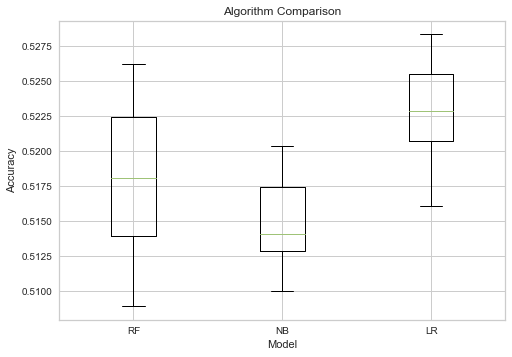

In [410]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Model')
pyplot.show()

### Prediction using Logistic Regression on Base, 0 and 1 Clusters

#### LogReg on Survival months (6 ranges)

In [388]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train_base, y6_train_base)
predictions = lrmodel.predict(X_test_base)
print(accuracy_score(y6_test_base, predictions))
print(confusion_matrix(y6_test_base, predictions))
print(classification_report(y6_test_base, predictions, digits=3))

0.3752358182191755
[[ 3850  1208   149   113   389   739]
 [ 1348  1709   206   164   322   598]
 [ 1337  1720   513   468  1236  2796]
 [  943  1144   405   485  1169  2710]
 [  666   702   298   332  1096  2278]
 [ 2188  1740   978  1220  3882 12436]]
              precision    recall  f1-score   support

        0-11      0.373     0.597     0.459      6448
       12-23      0.208     0.393     0.272      4347
       24-35      0.201     0.064     0.097      8070
       36-47      0.174     0.071     0.101      6856
       48-59      0.135     0.204     0.163      5372
        >=60      0.577     0.554     0.565     22444

    accuracy                          0.375     53537
   macro avg      0.278     0.314     0.276     53537
weighted avg      0.370     0.375     0.358     53537



In [389]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train0, y6_train0)
predictions = lrmodel.predict(X_test0)
print(accuracy_score(y6_test0, predictions))
print(confusion_matrix(y6_test0, predictions))
print(classification_report(y6_test0, predictions, digits=3))

0.35573223903565016
[[ 677  280   10   25   93  138]
 [ 267  392   30   27   79  121]
 [ 247  455   90   83  347  701]
 [ 165  284   80   89  315  647]
 [ 141  187   50   61  269  560]
 [ 400  451  148  232  912 2644]]
              precision    recall  f1-score   support

        0-11      0.357     0.554     0.434      1223
       12-23      0.191     0.428     0.264       916
       24-35      0.221     0.047     0.077      1923
       36-47      0.172     0.056     0.085      1580
       48-59      0.133     0.212     0.164      1268
        >=60      0.550     0.552     0.551      4787

    accuracy                          0.356     11697
   macro avg      0.271     0.308     0.263     11697
weighted avg      0.351     0.356     0.333     11697



In [390]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train1, y6_train1)
predictions = lrmodel.predict(X_test1)
print(accuracy_score(y6_test1, predictions))
print(confusion_matrix(y6_test1, predictions))
print(classification_report(y6_test1, predictions, digits=3))

0.37361376673040153
[[3132  919  209   86  318  561]
 [1088 1311  215  123  244  450]
 [1029 1260  503  384  980 1991]
 [ 713  830  472  380  912 1969]
 [ 496  492  302  265  903 1646]
 [1674 1270 1059 1031 3220 9403]]
              precision    recall  f1-score   support

        0-11      0.385     0.599     0.469      5225
       12-23      0.216     0.382     0.276      3431
       24-35      0.182     0.082     0.113      6147
       36-47      0.167     0.072     0.101      5276
       48-59      0.137     0.220     0.169      4104
        >=60      0.587     0.533     0.558     17657

    accuracy                          0.374     41840
   macro avg      0.279     0.315     0.281     41840
weighted avg      0.375     0.374     0.363     41840



#### LogReg on Survival months (3 ranges)

In [391]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train_base, y3_train_base)
predictions = lrmodel.predict(X_test_base)
print(accuracy_score(y3_test_base, predictions))
print(confusion_matrix(y3_test_base, predictions))
print(classification_report(y3_test_base, predictions, digits=3))

0.5213403814184583
[[ 9542  2133  3353]
 [ 4382  4147  7536]
 [ 3467  4755 14222]]
              precision    recall  f1-score   support

        0-29      0.549     0.635     0.589     15028
       30-59      0.376     0.258     0.306     16065
        >=60      0.566     0.634     0.598     22444

    accuracy                          0.521     53537
   macro avg      0.497     0.509     0.498     53537
weighted avg      0.504     0.521     0.508     53537



In [392]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train0, y3_train0)
predictions = lrmodel.predict(X_test0)
print(accuracy_score(y3_test0, predictions))
print(confusion_matrix(y3_test0, predictions))
print(classification_report(y3_test0, predictions, digits=3))

0.5062836624775583
[[1932  466  725]
 [ 968  922 1897]
 [ 740  979 3068]]
              precision    recall  f1-score   support

        0-29      0.531     0.619     0.571      3123
       30-59      0.390     0.243     0.300      3787
        >=60      0.539     0.641     0.586      4787

    accuracy                          0.506     11697
   macro avg      0.486     0.501     0.486     11697
weighted avg      0.488     0.506     0.489     11697



In [393]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train1, y3_train1)
predictions = lrmodel.predict(X_test1)
print(accuracy_score(y3_test1, predictions))
print(confusion_matrix(y3_test1, predictions))
print(classification_report(y3_test1, predictions, digits=3))

0.5256453154875717
[[ 7597  1808  2500]
 [ 3323  3447  5508]
 [ 2633  4075 10949]]
              precision    recall  f1-score   support

        0-29      0.561     0.638     0.597     11905
       30-59      0.369     0.281     0.319     12278
        >=60      0.578     0.620     0.598     17657

    accuracy                          0.526     41840
   macro avg      0.503     0.513     0.505     41840
weighted avg      0.512     0.526     0.516     41840



### Prediction Using Random Forest on Base, 0 and 1 Clusters

#### Random Forest Classifier on Survival months (6 ranges)

In [394]:
rfmodel = RandomForestClassifier(n_estimators=30)
rfmodel.fit(X_train_base, y6_train_base)
predictions = rfmodel.predict(X_test_base)
print(accuracy_score(y6_test_base, predictions))
print(confusion_matrix(y6_test_base, predictions))
print(classification_report(y6_test_base, predictions, digits=3))

0.4449446177410015
[[ 3264   590   473   170    90  1861]
 [ 1233   643   579   203    82  1607]
 [  902   543   943   396   253  5033]
 [  542   319   682   334   197  4782]
 [  325   198   471   272   218  3888]
 [  949   443  1303   777   553 18419]]
              precision    recall  f1-score   support

        0-11      0.452     0.506     0.478      6448
       12-23      0.235     0.148     0.182      4347
       24-35      0.212     0.117     0.151      8070
       36-47      0.155     0.049     0.074      6856
       48-59      0.156     0.041     0.064      5372
        >=60      0.518     0.821     0.635     22444

    accuracy                          0.445     53537
   macro avg      0.288     0.280     0.264     53537
weighted avg      0.358     0.445     0.377     53537



In [395]:
rfmodel = RandomForestClassifier(n_estimators=30)
rfmodel.fit(X_train0, y6_train0)
predictions = rfmodel.predict(X_test0)
print(accuracy_score(y6_test0, predictions))
print(confusion_matrix(y6_test0, predictions))
print(classification_report(y6_test0, predictions, digits=3))

0.4270325724544755
[[ 563  114  113   35   19  379]
 [ 244  150  131   36   24  331]
 [ 159  127  249  111   43 1234]
 [ 104   69  156   86   53 1112]
 [  75   37  109   55   48  944]
 [ 162   82  331  191  122 3899]]
              precision    recall  f1-score   support

        0-11      0.431     0.460     0.445      1223
       12-23      0.259     0.164     0.201       916
       24-35      0.229     0.129     0.165      1923
       36-47      0.167     0.054     0.082      1580
       48-59      0.155     0.038     0.061      1268
        >=60      0.494     0.814     0.615      4787

    accuracy                          0.427     11697
   macro avg      0.289     0.277     0.261     11697
weighted avg      0.344     0.427     0.359     11697



In [396]:
rfmodel = RandomForestClassifier(n_estimators=30)
rfmodel.fit(X_train1, y6_train1)
predictions = rfmodel.predict(X_test1)
print(accuracy_score(y6_test1, predictions))
print(confusion_matrix(y6_test1, predictions))
print(classification_report(y6_test1, predictions, digits=3))

0.4513862332695985
[[ 2707   460   365   127    81  1485]
 [  987   507   437   153    63  1284]
 [  713   420   645   313   178  3878]
 [  425   265   517   278   159  3632]
 [  281   169   346   231   172  2905]
 [  756   335   946   627   416 14577]]
              precision    recall  f1-score   support

        0-11      0.461     0.518     0.488      5225
       12-23      0.235     0.148     0.181      3431
       24-35      0.198     0.105     0.137      6147
       36-47      0.161     0.053     0.079      5276
       48-59      0.161     0.042     0.066      4104
        >=60      0.525     0.826     0.642     17657

    accuracy                          0.451     41840
   macro avg      0.290     0.282     0.266     41840
weighted avg      0.364     0.451     0.383     41840



#### Random Forest Classifier on Survival months (3 ranges)

In [397]:
rfmodel = RandomForestClassifier(n_estimators=30)
rfmodel.fit(X_train_base, y3_train_base)
predictions = rfmodel.predict(X_test_base)
print(accuracy_score(y3_test_base, predictions))
print(confusion_matrix(y3_test_base, predictions))
print(classification_report(y3_test_base, predictions, digits=3))

0.5168761790910958
[[ 8345  2420  4263]
 [ 3490  4012  8563]
 [ 2603  4526 15315]]
              precision    recall  f1-score   support

        0-29      0.578     0.555     0.566     15028
       30-59      0.366     0.250     0.297     16065
        >=60      0.544     0.682     0.606     22444

    accuracy                          0.517     53537
   macro avg      0.496     0.496     0.490     53537
weighted avg      0.500     0.517     0.502     53537



In [398]:
rfmodel = RandomForestClassifier(n_estimators=30)
rfmodel.fit(X_train1, y3_train1)
predictions = rfmodel.predict(X_test1)
print(accuracy_score(y3_test1, predictions))
print(confusion_matrix(y3_test1, predictions))
print(classification_report(y3_test1, predictions, digits=3))

0.5233269598470364
[[ 6637  1893  3375]
 [ 2692  3062  6524]
 [ 2038  3422 12197]]
              precision    recall  f1-score   support

        0-29      0.584     0.557     0.570     11905
       30-59      0.366     0.249     0.296     12278
        >=60      0.552     0.691     0.614     17657

    accuracy                          0.523     41840
   macro avg      0.500     0.499     0.494     41840
weighted avg      0.506     0.523     0.508     41840



In [399]:
rfmodel = RandomForestClassifier(n_estimators=30)
rfmodel = rfmodel.fit(X_train0, y3_train0)
predictions = rfmodel.predict(X_test0)
print(accuracy_score(y3_test0, predictions))
print(confusion_matrix(y3_test0, predictions))
print(classification_report(y3_test0, predictions, digits=3))

0.4991023339317774
[[1641  604  878]
 [ 740 1082 1965]
 [ 511 1161 3115]]
              precision    recall  f1-score   support

        0-29      0.567     0.525     0.546      3123
       30-59      0.380     0.286     0.326      3787
        >=60      0.523     0.651     0.580      4787

    accuracy                          0.499     11697
   macro avg      0.490     0.487     0.484     11697
weighted avg      0.489     0.499     0.489     11697



In [400]:
print(sorted(zip(map(lambda x: round(x, 4), rfmodel.feature_importances_), X_train_base.columns), reverse=True))

[(0.1476, 'Regional nodes examined'), (0.1088, 'Age'), (0.1076, 'Tumor Size'), (0.0907, 'Site'), (0.0883, 'Median household income'), (0.0624, 'Regional nodes positive'), (0.0521, 'Surg Prim Site'), (0.0412, 'Race'), (0.0402, 'Grade'), (0.039, 'Num of in situ/malignant tumors'), (0.0333, 'Derived AJCC Stage Group'), (0.0332, 'Combined Summary Stage 2000'), (0.0328, 'Sex'), (0.0292, 'Derived AJCC T'), (0.017, 'Systemic/Sur Seq'), (0.0147, 'Derived AJCC M'), (0.0141, 'Derived AJCC N'), (0.0113, 'Chemotherapy'), (0.0088, 'Radiation'), (0.0086, 'Surg/Rad Seq'), (0.0072, 'Scope Reg Lymph Node Surg'), (0.0071, 'Primary by international rules'), (0.0031, 'Laterality'), (0.0016, 'Num of benign/borderline tumors'), (0.0002, 'Diagnostic Confirmation')]


### Prediction Using Naive Bayes on Base, 0 and 1 Clusters

#### NB Classifier on Survival months (6 ranges)

In [401]:
model = GaussianNB()
model.fit(X_train_base, y6_train_base)
predictions = model.predict(X_test_base)
print(accuracy_score(y6_test_base, predictions))
print(confusion_matrix(y6_test_base, predictions))
print(classification_report(y6_test_base, predictions, digits=3))

0.4423669611670433
[[ 3450   491    85    15   110  2297]
 [ 1746   749   122    19   104  1607]
 [ 1320   954   227    41   251  5277]
 [  799   658   174    63   245  4917]
 [  492   404   139    29   210  4098]
 [ 1384   989   365    73   649 18984]]
              precision    recall  f1-score   support

        0-11      0.375     0.535     0.441      6448
       12-23      0.176     0.172     0.174      4347
       24-35      0.204     0.028     0.049      8070
       36-47      0.263     0.009     0.018      6856
       48-59      0.134     0.039     0.061      5372
        >=60      0.511     0.846     0.637     22444

    accuracy                          0.442     53537
   macro avg      0.277     0.272     0.230     53537
weighted avg      0.351     0.442     0.350     53537



In [402]:
model = GaussianNB()
model.fit(X_train0, y6_train0)
predictions = model.predict(X_test0)
print(accuracy_score(y6_test0, predictions))
print(confusion_matrix(y6_test0, predictions))
print(classification_report(y6_test0, predictions, digits=3))

0.42070616397366845
[[ 529  234   15   13    6  426]
 [ 228  327   25   13   15  308]
 [ 138  409   54   49   34 1239]
 [  82  263   59   44   18 1114]
 [  56  174   35   28   12  963]
 [ 151  386  110  131   54 3955]]
              precision    recall  f1-score   support

        0-11      0.447     0.433     0.440      1223
       12-23      0.182     0.357     0.241       916
       24-35      0.181     0.028     0.049      1923
       36-47      0.158     0.028     0.047      1580
       48-59      0.086     0.009     0.017      1268
        >=60      0.494     0.826     0.618      4787

    accuracy                          0.421     11697
   macro avg      0.258     0.280     0.235     11697
weighted avg      0.324     0.421     0.334     11697



In [403]:
model = GaussianNB()
model.fit(X_train1, y6_train1)
predictions = model.predict(X_test1)
print(accuracy_score(y6_test1, predictions))
print(confusion_matrix(y6_test1, predictions))
print(classification_report(y6_test1, predictions, digits=3))

0.4465105162523901
[[ 2868   375    68    12    76  1826]
 [ 1443   557    92    11    66  1262]
 [ 1066   704   196    30   161  3990]
 [  678   517   151    47   167  3716]
 [  404   321   116    16   147  3100]
 [ 1153   846   354    60   377 14867]]
              precision    recall  f1-score   support

        0-11      0.377     0.549     0.447      5225
       12-23      0.168     0.162     0.165      3431
       24-35      0.201     0.032     0.055      6147
       36-47      0.267     0.009     0.017      5276
       48-59      0.148     0.036     0.058      4104
        >=60      0.517     0.842     0.641     17657

    accuracy                          0.447     41840
   macro avg      0.280     0.272     0.230     41840
weighted avg      0.357     0.447     0.356     41840



#### NB Classifier on Survival months (3 ranges)

In [404]:
model = GaussianNB()
model.fit(X_train_base, y3_train_base)
predictions = model.predict(X_test_base)
print(accuracy_score(y3_test_base, predictions))
print(confusion_matrix(y3_test_base, predictions))
print(classification_report(y3_test_base, predictions, digits=3))

0.5145973812503503
[[ 7659   787  6582]
 [ 3479  1235 11351]
 [ 2532  1256 18656]]
              precision    recall  f1-score   support

        0-29      0.560     0.510     0.534     15028
       30-59      0.377     0.077     0.128     16065
        >=60      0.510     0.831     0.632     22444

    accuracy                          0.515     53537
   macro avg      0.482     0.473     0.431     53537
weighted avg      0.484     0.515     0.453     53537



In [405]:
model = GaussianNB()
model.fit(X_train0, y3_train0)
predictions = model.predict(X_test0)
print(accuracy_score(y3_test0, predictions))
print(confusion_matrix(y3_test0, predictions))
print(classification_report(y3_test0, predictions, digits=3))

0.49705052577583997
[[1697  124 1302]
 [ 875  233 2679]
 [ 621  282 3884]]
              precision    recall  f1-score   support

        0-29      0.531     0.543     0.537      3123
       30-59      0.365     0.062     0.105      3787
        >=60      0.494     0.811     0.614      4787

    accuracy                          0.497     11697
   macro avg      0.463     0.472     0.419     11697
weighted avg      0.462     0.497     0.429     11697



In [406]:
model = GaussianNB()
model.fit(X_train1, y3_train1)
predictions = model.predict(X_test1)
print(accuracy_score(y3_test1, predictions))
print(confusion_matrix(y3_test1, predictions))
print(classification_report(y3_test1, predictions, digits=3))

0.518546845124283
[[ 6145   513  5247]
 [ 2804   806  8668]
 [ 2159   753 14745]]
              precision    recall  f1-score   support

        0-29      0.553     0.516     0.534     11905
       30-59      0.389     0.066     0.112     12278
        >=60      0.514     0.835     0.637     17657

    accuracy                          0.519     41840
   macro avg      0.486     0.472     0.428     41840
weighted avg      0.489     0.519     0.454     41840



# LogReg results for test_base

accuracy: 0.5215001284356537  

Confusion Matrix:  
  
||Pred 0|Pred 1|Pred 2|
|---|---|---|---|
|Actual 0|8802|1680|2077 |
|Actual 1|5619|5622|10684|
|Actual 2|3007|4875|16029|

||precision|recall|f1-score|support|
|---	|:---	|:---	|:---	|:--- |
|0   	|0.505  |0.701  |0.587   |12559|
|1   	|0.462  |0.256 	|0.330 	| 21925|
|2   	|0.557 	|0.670	|0.608 	| 23911|
|macro avg 	| 0.508  |0.543	|0.508 	| 58395 |
|weighted avg |0.510 |0.522	| 0.499	| 58395 |

## Linear Regression 

In [407]:
lrmodel = LinearRegression()
lrmodel.fit(X_train_base, yc_train_base)
predictions = lrmodel.predict(X_test_base)
print(r2_score(yc_test_base, predictions))
print(mean_squared_error(yc_test_base, predictions, squared=False))

0.20495609122261427
33.776982044560825


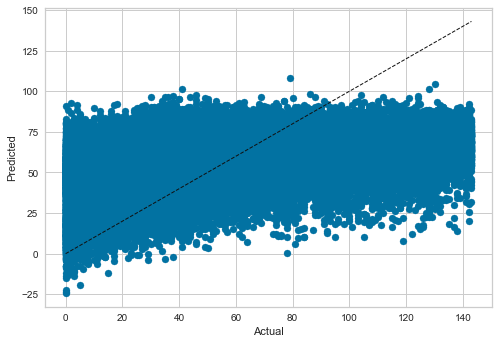

In [422]:
fig, ax = plt.subplots()
ax.scatter(yc_test_base, predictions)
ax.plot([yc_test_base.min(), yc_test_base.max()], [yc_test_base.min(), yc_test_base.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [423]:
lrmodel = LinearRegression()
lrmodel.fit(X_train1, yc_train1)
predictions = lrmodel.predict(X_test1)
print(r2_score(yc_test1, predictions))
print(mean_squared_error(yc_test1, predictions, squared=False))

0.21152213379526108
34.00924413390754


In [424]:
lrmodel = LinearRegression()
lrmodel.fit(X_train0, yc_train0)
predictions = lrmodel.predict(X_test0)
print(r2_score(yc_test0, predictions))
print(mean_squared_error(yc_test0, predictions, squared=False))

0.18390667119170334
32.82827047937867


## Re-do Kmeans and model using further filtered dataset on Survival months (3 ranges)

In [425]:
data2_filt = data2.iloc[:, [19,8,11,10,20,7,0,18,9,4,21,22,27,28]]

In [426]:
data2_filt_cont = data2.iloc[:, [8,11,10,19,9,0,4,20,7,21,22,27,28]]

In [427]:
filt_no_target = data2_filt.drop(['Alive/Dead', 'Survival months', 'Survival months_6bins', 'Survival months_3bins'],axis=1)
filt_target = data2_filt[['Survival months_3bins']]

In [428]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(filt_no_target)
    Sum_of_squared_distances.append(km.inertia_)

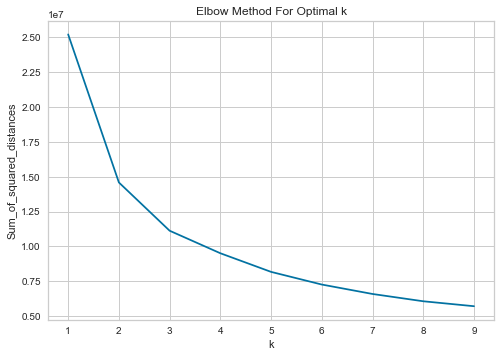

In [429]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [430]:
from sklearn.model_selection import train_test_split

Xf = data2_filt.drop(['Alive/Dead', 'Survival months', 'Survival months_3bins', 'Survival months_6bins'],axis=1)
yf = data2_filt['Survival months_3bins']

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.30, random_state=42)

In [431]:
from typing import Tuple

In [432]:
def get_clusters(Xf_train: pd.DataFrame, Xf_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:

    clustering = KMeans(n_clusters=n_clusters, random_state=1022)
    clustering.fit(Xf_train)

    train_labels = clustering.labels_
    Xf_train_clstrs = Xf_train.copy()
    Xf_train_clstrs['clusters'] = train_labels
    

    test_labels = clustering.predict(Xf_test)
    Xf_test_clstrs = Xf_test.copy()
    Xf_test_clstrs['clusters'] = test_labels
    
    return Xf_train_clstrs, Xf_test_clstrs

In [433]:
Xf_train_clstrs, Xf_test_clstrs = get_clusters(Xf_train, Xf_test, 2)

In [434]:
from sklearn.preprocessing import StandardScaler
def scale_features(Xf_train_clstrs: pd.DataFrame, Xf_test_clstrs: pd.DataFrame):
    sc = StandardScaler()
    Xf_train_clstrs = sc.fit_transform(Xf_train_clstrs)
    Xf_test_clstrs = sc.transform(Xf_test_clstrs)
    
    return Xf_train_clstrs, Xf_test_clstrs
Xf_train_scaled, Xf_test_scaled = scale_features(Xf_train_clstrs, Xf_test_clstrs)

In [435]:
Xf_train_scaled = pd.DataFrame(Xf_train_scaled, index=Xf_train_clstrs.index, columns=Xf_train_clstrs.columns)

In [436]:
Xf_test_scaled = pd.DataFrame(Xf_test_scaled, index=Xf_test_clstrs.index, columns=Xf_test_clstrs.columns)

In [437]:
# locate the "0" cluster
Xf_train0 = Xf_train_scaled[Xf_train_scaled['clusters'] < 0]
Xf_test0 = Xf_test_scaled[Xf_test_scaled['clusters'] < 0]
yf_train0 = yf_train[Xf_train_scaled['clusters'] < 0]
yf_test0 = yf_test[Xf_test_scaled['clusters'] < 0]

# locate the "1" cluster
Xf_train1 = Xf_train_scaled[Xf_train_scaled['clusters'] > 0]
Xf_test1 = Xf_test_scaled[Xf_test_scaled['clusters'] > 0]
yf_train1 = yf_train[Xf_train_scaled['clusters'] > 0]
yf_test1 = yf_test[Xf_test_scaled['clusters'] > 0]

# drop cluster from the base dataset 
Xf_train_base = Xf_train_scaled.drop(columns=['clusters'])
Xf_test_base = Xf_test_scaled.drop(columns=['clusters'])
yf_train_base = yf_train.copy()
yf_test_base = yf_test.copy()

### Classification

In [438]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators=20)))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, Xf_train_base, yf_train_base, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.475184 (0.002729)
NB: 0.514514 (0.003625)
LR: 0.515650 (0.003929)


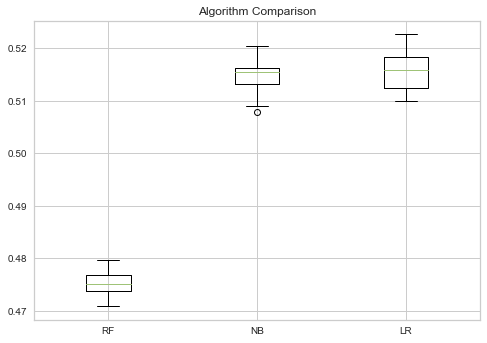

In [439]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()